In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

### Exercici 1
Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

El nostre dataset conté les següents columnes:

1. CRIM      per capita crime rate by town

2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.

3. INDUS     proportion of non-retail business acres per town

4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5. NOX       nitric oxides concentration (parts per 10 million)

6. RM        average number of rooms per dwelling

7. AGE       proportion of owner-occupied units built prior to 1940

8. DIS       weighted distances to five Boston employment centres

9. RAD       index of accessibility to radial highways

10. TAX      full-value property-tax rate per $10,000

11. PTRATIO  pupil-teacher ratio by town

12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13. LSTAT    % lower status of the population

14. MEDV     Median value of owner-occupied homes in $1000's


Establim el nom de les columnes, llegim el dataset a dataframe de pandas, el partim en train i test i fem un dataframe per poder-les analitzar

In [3]:
columnes=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B', 'LSTAT', 'MEDV']

In [4]:
df=pd.read_csv("housing_data.csv", names=columnes)

In [5]:
train, test=train_test_split(df,test_size=0.33, random_state=1)

In [6]:
train_df=pd.DataFrame(train,columns=columnes)
test_df=pd.DataFrame(test,columns=columnes)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 378 to 37
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     339 non-null    float64
 1   ZN       339 non-null    float64
 2   INDUS    339 non-null    float64
 3   CHAS     339 non-null    int64  
 4   NOX      339 non-null    float64
 5   RM       339 non-null    float64
 6   AGE      339 non-null    float64
 7   DIS      339 non-null    float64
 8   RAD      339 non-null    int64  
 9   TAX      339 non-null    float64
 10  PTRATIO  339 non-null    float64
 11  B        339 non-null    float64
 12  LSTAT    339 non-null    float64
 13  MEDV     339 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 39.7 KB


Com podem veure a la info tots els atributs són númerics , la majoria d'ells amb decimals excepte 'CHAS' i 'RAD'

In [8]:
train_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
train_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No tenim cap camp buit que ens pugui portar a calculs estadístics erronis, no hem de fer feina de neteja de NaNs

In [10]:
train_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,3.793986,10.963127,11.377493,0.079646,0.556238,6.247490,69.173451,3.799550,9.622419,408.890855,18.418584,356.552537,13.087522,22.289971
std,8.669966,23.058729,6.874160,0.271145,0.117996,0.669953,28.246657,2.114897,8.768838,169.654094,2.176714,92.095470,7.340139,9.093571
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.863000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.085770,0.000000,5.640000,0.000000,0.448000,5.873000,45.750000,2.094450,4.000000,279.000000,17.000000,375.990000,7.415000,16.900000
50%,0.253870,0.000000,9.900000,0.000000,0.538000,6.167000,79.700000,3.262800,5.000000,330.000000,19.000000,391.450000,12.030000,20.600000
75%,3.812340,12.500000,18.100000,0.000000,0.627500,6.582500,94.300000,5.033750,24.000000,666.000000,20.200000,396.060000,17.135000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.398000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


A la descripció del dataframe podem veure la quantitat de registres, així com la mitjana, la desviació estàndart, els percentils i els valors màxim i minim per a cada atribut. Podem observar que són dades molt heterogènies amb mitjanes i desviacions estàndart de escales molt diferents.

In [11]:
train_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
378,23.64820,0.0,18.10,0,0.671,6.380,96.2,1.3861,24,666.0,20.2,396.90,23.69,13.1
127,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,4,437.0,21.2,392.11,17.19,16.2
82,0.03659,25.0,4.86,0,0.426,6.302,32.2,5.4007,4,281.0,19.0,396.90,6.72,24.8
463,5.82115,0.0,18.10,0,0.713,6.513,89.9,2.8016,24,666.0,20.2,393.82,10.29,20.2
207,0.25199,0.0,10.59,0,0.489,5.783,72.7,4.3549,4,277.0,18.6,389.43,18.06,22.5
27,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
89,0.05302,0.0,3.41,0,0.489,7.079,63.1,3.4145,2,270.0,17.8,396.06,5.70,28.7
469,13.07510,0.0,18.10,0,0.580,5.713,56.7,2.8237,24,666.0,20.2,396.90,14.76,20.1
73,0.19539,0.0,10.81,0,0.413,6.245,6.2,5.2873,4,305.0,19.2,377.17,7.54,23.4
187,0.07875,45.0,3.44,0,0.437,6.782,41.1,3.7886,5,398.0,15.2,393.87,6.68,32.0


Visualitzar les 10 primeres files ens pot servir per pendre contacte amb el dataframe real.

<Axes: >

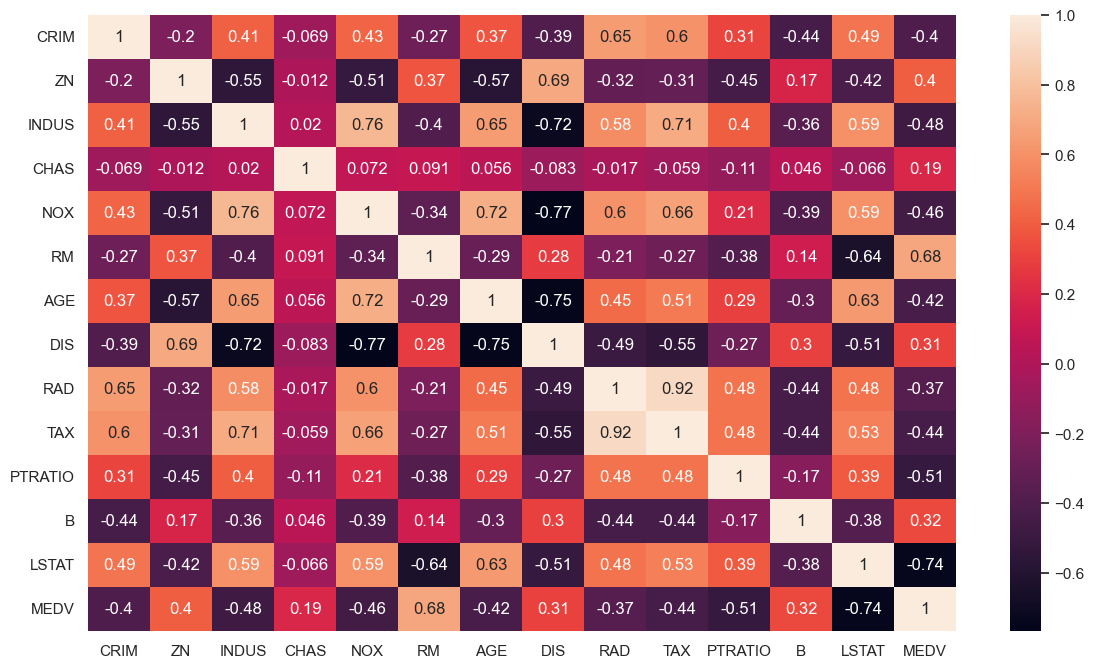

In [12]:
sns.set(rc={'figure.figsize':(14,8)})
sns.heatmap(train_df.corr(), annot=True)

Si prenem com a correlació un valor superior a 0.7, al heatmap de correlacions amb anotacions podem identificar correlació positiva entre les següents columnes:

-'INDUS' amb 'NOX'

-'INDUS' amb 'TAX'

-'NOX' amb 'AGE'

-'RAD' amb 'TAX' (0.92)


Podem observar correlació negativa entre les següents columnes:

-'INDUS' amb 'DIS'

-'NOX' amb 'DIS'

-'AGE' amb 'DIS'

-'LSTAT' amb 'MEDV'



Sembla lògic que les zones amb un nivell de negocis que no son de venda ('INDUS') (assumim pel nom que és refereix a fàbriques) tinguin relació amb el nivell de oxid de nitrògen('NOX'), que segons https://www.apis.ac.uk/overview/pollutants/overview_nox.htm i altres webs consultades s'origina principalment per la combustió de fuel, especialment a la industria i el transport (que està també molt present al voltant de les fàbriques.)

També sembla versemblant que les zones més industrialitzades ('INDUS') estiguin relaciones amb un major nivell d'impostos ('TAX') ja que les empreses solen pagar més quantitat d'impostos que els ciutadans particulars.

També hi ha una correlació entre el nivell d'òxid de nitrogen ('NOX') i la quantitat d'edificis residencials anterior al 1940 ('AGE'). Això pot ser causat a que antigament no és tenien en compte les qüestions ambientals a l'hora de construir un edifici i segons que materials o la calefacció per gasoil poder emetre més òxid de nitrògen.

Destaca per ser més elevada la correlació entre l'accesibilitat a autovies/autopistes ('RAD') i el pagament d'impostos. Donat que és una infraestructura cara de mantenir, sembla lògica aquesta correlació.

En quant a les correlacions negatives hem vist que 'INDUS', 'NOX' i 'AGE' tenen correlació negativa amb 'DIS', té lògica que les zones més industrialitzades i amb més contaminació estiguin a menys distància dels centres de treball. La correlació d''AGE' fa pensar que el nivell de correlació que aquesta té amb 'NOX' potser no té a veure amb els materials sino amb la seva ubicació. I si mirem al gràfic veiem que efectivament entre la edat de l'edifici i que estigui a una zona industrial hi ha una correlació de 0.64. I d'aquií que també els edificis més antics estiguin a menys distància dels llocs de treball


Fem una ullada als outliers

<Axes: >

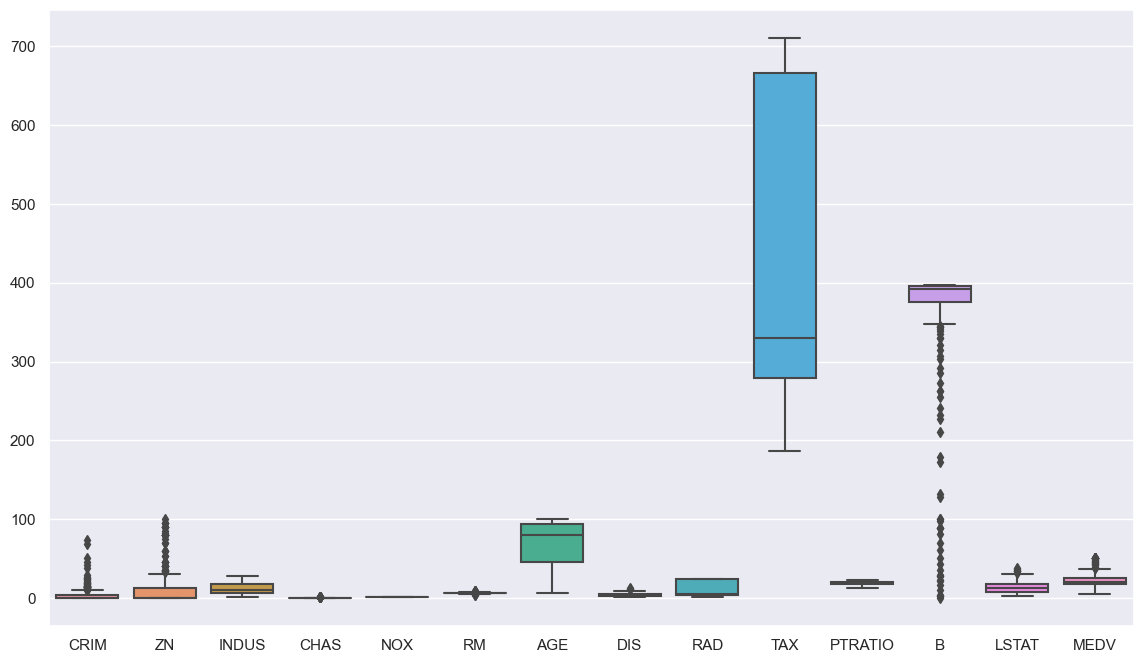

In [13]:
sns.boxplot(train_df)

La diferent d'escala no ens deixa apreciar bé el gràfic, de moment separarem els atributs segons l'escala:

<Axes: >

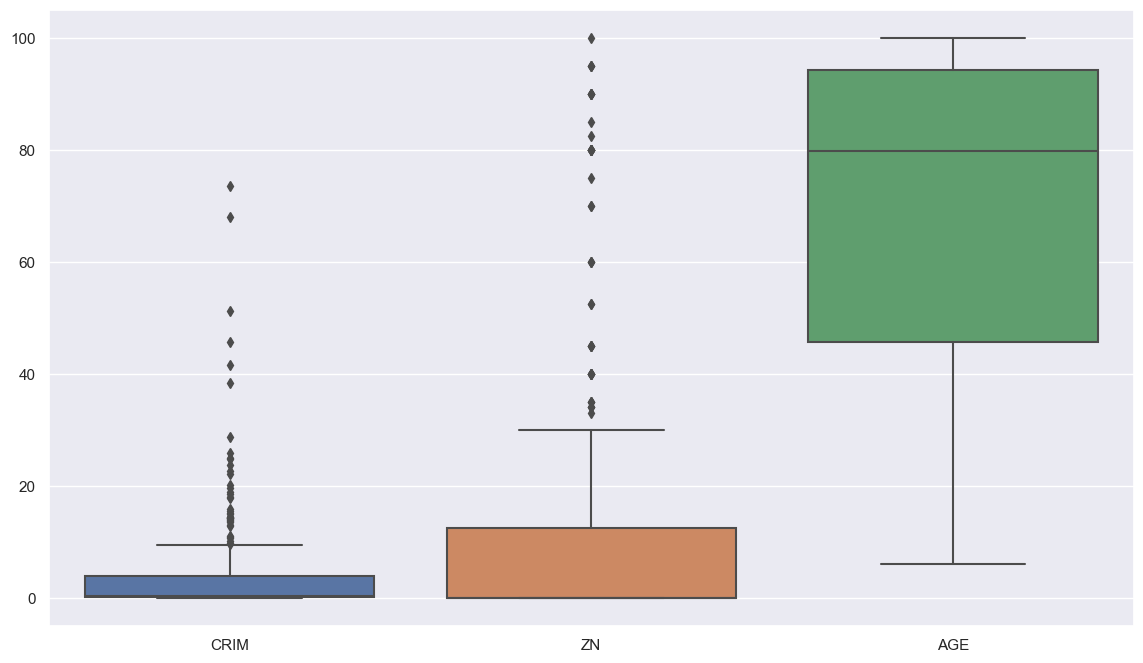

In [14]:
sns.boxplot(train_df.loc[:,['CRIM', 'ZN', 'AGE']])


Podem observar que el ratio de crims ('CRIM') i el percentatge d'us residencial per a terrenys de més de 25000 peus cuadrats (2322 metres cuadrats) ('ZN') tenen molts outliers, que de moment no modificarem, mentre que l'antiguitat dels edificis no en té.

<Axes: >

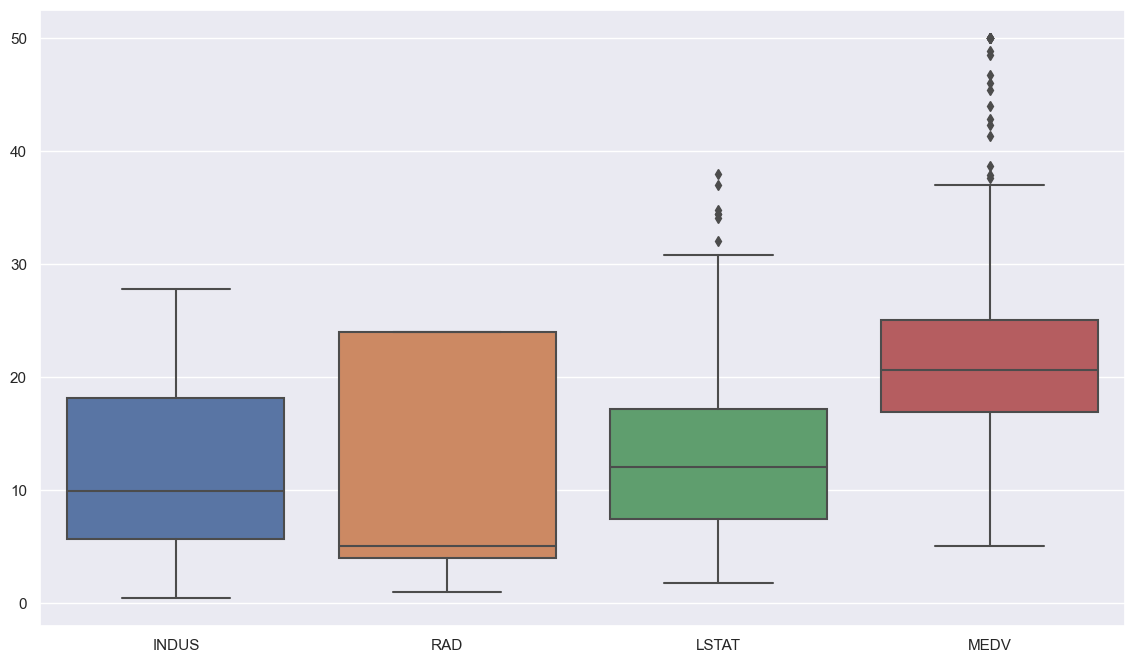

In [15]:
sns.boxplot(train_df.loc[:,['INDUS', 'RAD', 'LSTAT', 'MEDV']])


Aquí podem observar que els atributs INDUS i RAD no tenen outliers, l'atribut 'LSTAT' en té uns quants i 'MEDV' en té bastants.

<Axes: >

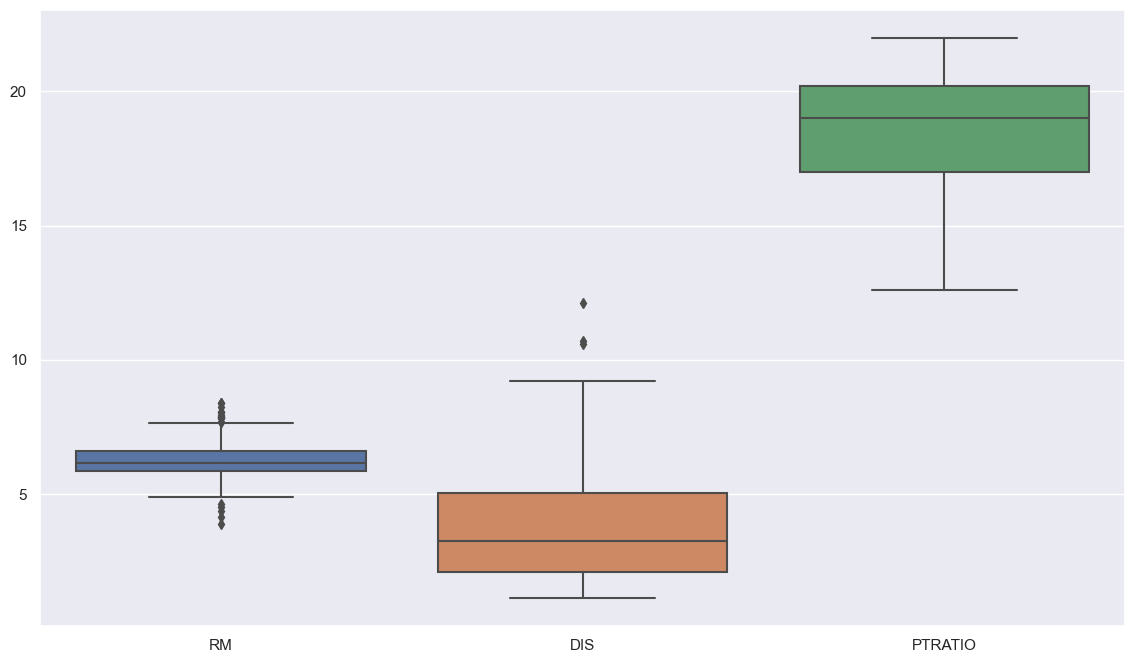

In [16]:
sns.boxplot(train_df.loc[:,['RM', 'DIS','PTRATIO']])

Podem veure que l'atribut de mitjana d'habitacions per vivenda ('RM') té molts outliers tant per sota com per damunt. Això podria estar influit per la presencia de molts hotels a una zona. Si els outliers per sota fossin de 0 podria ser per presencia de molts lofts sense habitació, però no es el cas, els outliers per sota no baixen de 3, el qual és un nombre molt raonable d'habitacions per a una vivenda. La mitjana de sis és una mica excesiva, així que podem assumir que edificis amb moltes habitacions que consten com a una sola propietat tipus hotels o b&b l'estan tirant cap amunt.

Els outliers per més distància als llocs de treball ('DIS') poden deures a poblacions més rurals o més remotes.

<Axes: >

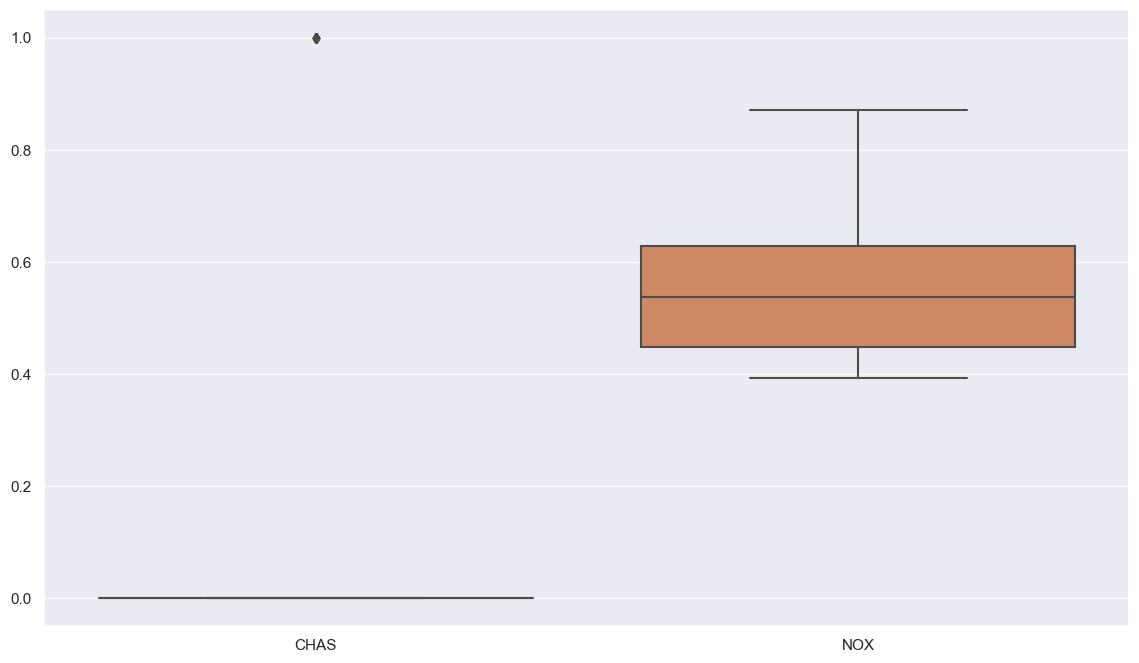

In [17]:
sns.boxplot(train_df.loc[:,['CHAS', 'NOX']])

CHAS es una variable binaria que només accepta valors 0 o 1 en funció de si la zona limita amb el riu, d'aquí la seva representació.

La variable de concentració d'òxid de nitrogen no sembla tenir outliers.

<Axes: >

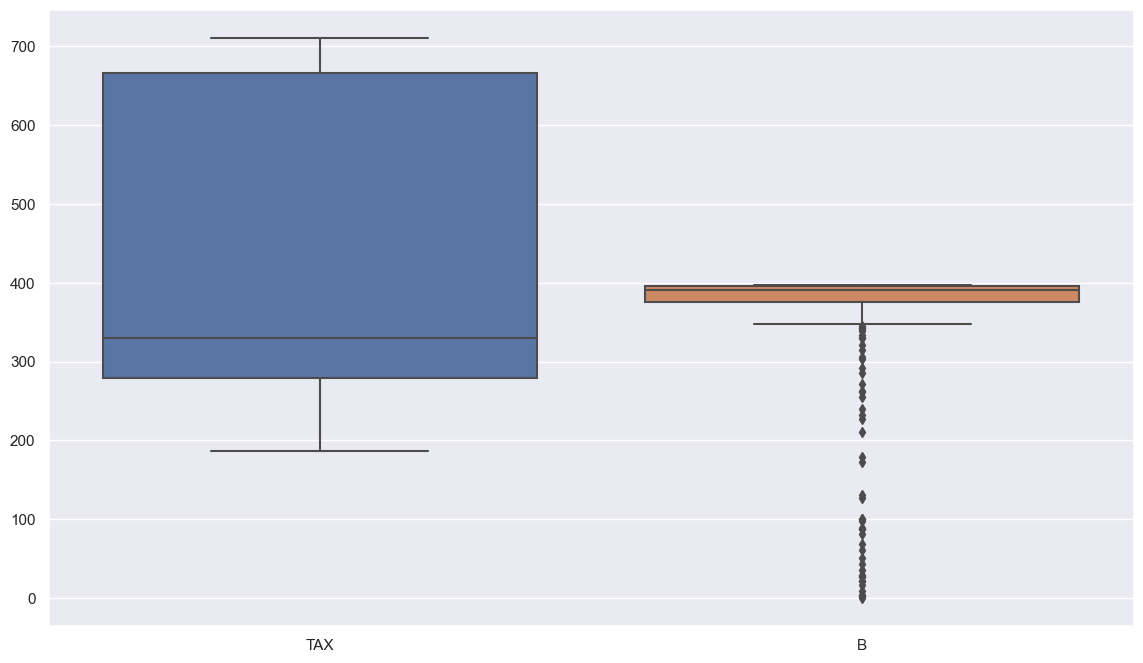

In [19]:
sns.boxplot(train_df.loc[:,['TAX', 'B']])

Mentre la variable del rati d'impostos no tenen outliers, la de la proporció de persones negres per població si que té molts outliers per la part de sota. Això podria ser perque històricament les persones negres han viscut a barris concrets i  les zones on no hi ha aquest barris de gran concentració però si hi ha presencia de persones negres podrien sortir com outliers.

Fem una breu anàlisi de les dades de test

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 307 to 347
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     167 non-null    float64
 1   ZN       167 non-null    float64
 2   INDUS    167 non-null    float64
 3   CHAS     167 non-null    int64  
 4   NOX      167 non-null    float64
 5   RM       167 non-null    float64
 6   AGE      167 non-null    float64
 7   DIS      167 non-null    float64
 8   RAD      167 non-null    int64  
 9   TAX      167 non-null    float64
 10  PTRATIO  167 non-null    float64
 11  B        167 non-null    float64
 12  LSTAT    167 non-null    float64
 13  MEDV     167 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 19.6 KB


In [21]:
test_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Com era d'esperar els atributs són del mateix tipus i tampoc contenen valors nuls

In [22]:
test_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,3.247195,12.176647,10.648144,0.047904,0.551563,6.360036,67.359880,3.785894,9.401198,406.910180,18.530539,356.920659,11.771138,23.025749
std,8.474939,23.898258,6.826662,0.214206,0.111736,0.761180,27.994376,2.093240,8.605168,166.745525,2.145399,89.921726,6.653123,9.412079
min,0.010960,0.000000,1.250000,0.000000,0.385000,3.561000,2.900000,1.178100,1.000000,188.000000,13.000000,3.650000,1.920000,6.300000
25%,0.076945,0.000000,4.675000,0.000000,0.458000,5.979500,41.700000,2.101800,4.000000,281.000000,17.400000,373.715000,6.605000,17.500000
50%,0.261690,0.000000,8.560000,0.000000,0.532000,6.310000,73.300000,3.092300,5.000000,337.000000,19.100000,390.680000,10.240000,22.100000
75%,3.122525,20.000000,18.100000,0.000000,0.624000,6.630500,93.150000,5.307650,16.000000,666.000000,20.200000,396.660000,15.695000,25.200000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,30.810000,50.000000


Podem veure que la mitjana, la desviació estàndart i els percentils són molt similars en ambdós dataframes, així que podem asumir que s'ha fet una bona divisió on el test es un conjunt de valors més petits però igualment representatiu de les dades.

<Axes: >

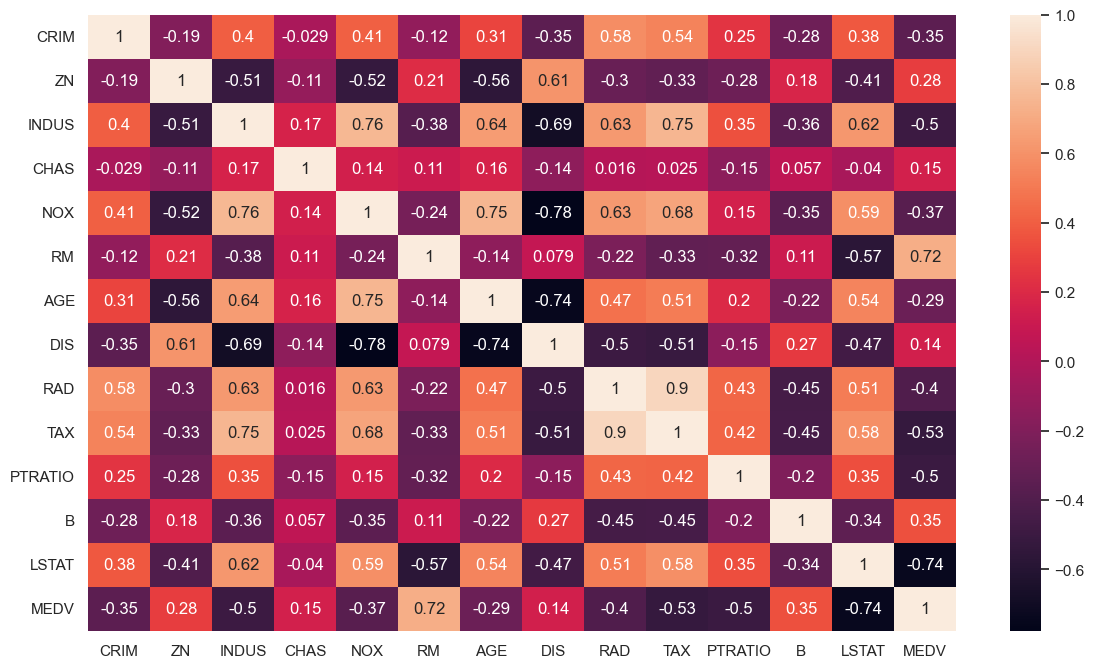

In [23]:
sns.heatmap(test_df.corr(), annot=True)

Podem veure que els índex de correlació són molt semblants als de les dades de test amb variacions d'unes centésimes.

<Axes: >

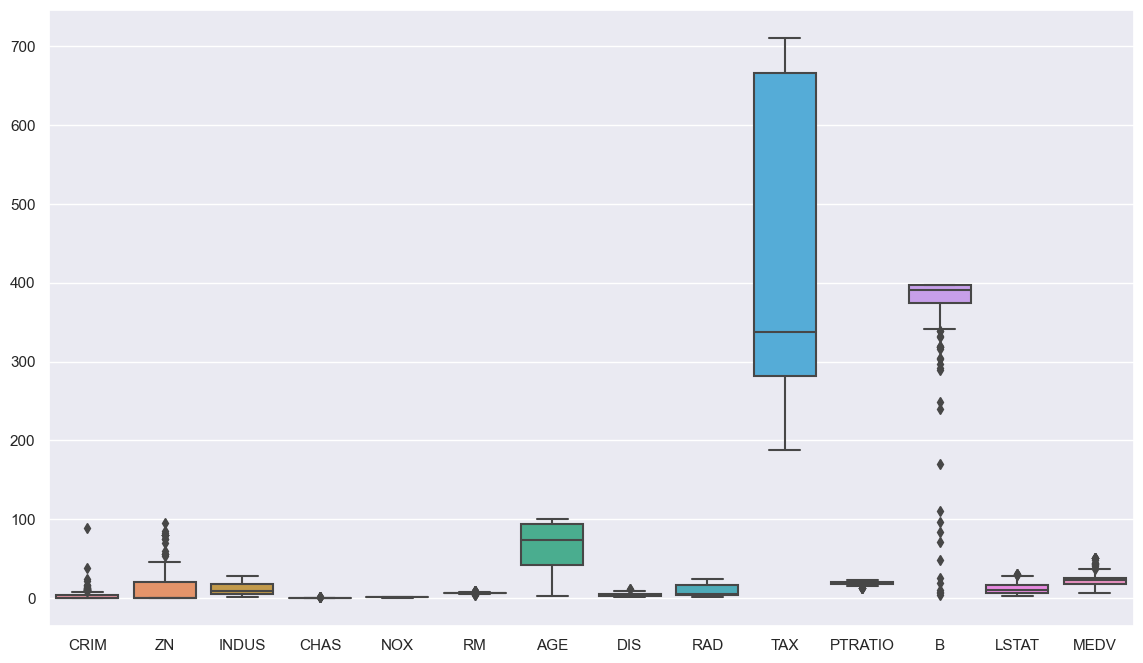

In [24]:
sns.boxplot(test_df)

No entrarem a analitzar per atributs, però podem veure que la presencia d'outliers és molt similar que a les dades de test.

### Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...)

Primer comprovarem que la columna RAD es en realitat una variable categòrica

In [25]:
train_df['RAD'].value_counts()

24    90
5     78
4     71
3     24
2     19
6     18
8     15
1     13
7     11
Name: RAD, dtype: int64

Crearem columnes dummies per substituir-la

In [26]:
train_df=pd.get_dummies(train_df, columns=['RAD'])

In [27]:
train_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
378,23.64820,0.0,18.10,0,0.671,6.380,96.2,1.3861,666.0,20.2,...,13.1,0,0,0,0,0,0,0,0,1
127,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,437.0,21.2,...,16.2,0,0,0,1,0,0,0,0,0
82,0.03659,25.0,4.86,0,0.426,6.302,32.2,5.4007,281.0,19.0,...,24.8,0,0,0,1,0,0,0,0,0
463,5.82115,0.0,18.10,0,0.713,6.513,89.9,2.8016,666.0,20.2,...,20.2,0,0,0,0,0,0,0,0,1
207,0.25199,0.0,10.59,0,0.489,5.783,72.7,4.3549,277.0,18.6,...,22.5,0,0,0,1,0,0,0,0,0


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 378 to 37
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     339 non-null    float64
 1   ZN       339 non-null    float64
 2   INDUS    339 non-null    float64
 3   CHAS     339 non-null    int64  
 4   NOX      339 non-null    float64
 5   RM       339 non-null    float64
 6   AGE      339 non-null    float64
 7   DIS      339 non-null    float64
 8   TAX      339 non-null    float64
 9   PTRATIO  339 non-null    float64
 10  B        339 non-null    float64
 11  LSTAT    339 non-null    float64
 12  MEDV     339 non-null    float64
 13  RAD_1    339 non-null    uint8  
 14  RAD_2    339 non-null    uint8  
 15  RAD_3    339 non-null    uint8  
 16  RAD_4    339 non-null    uint8  
 17  RAD_5    339 non-null    uint8  
 18  RAD_6    339 non-null    uint8  
 19  RAD_7    339 non-null    uint8  
 20  RAD_8    339 non-null    uint8  
 21  RAD_24   339 no

Ara un gràfic KDE amb les dades sense estandaritzar, per veure si ens útil o si necesitem estandarització. Utilitzarem les dades de train.

<function matplotlib.pyplot.show(close=None, block=None)>

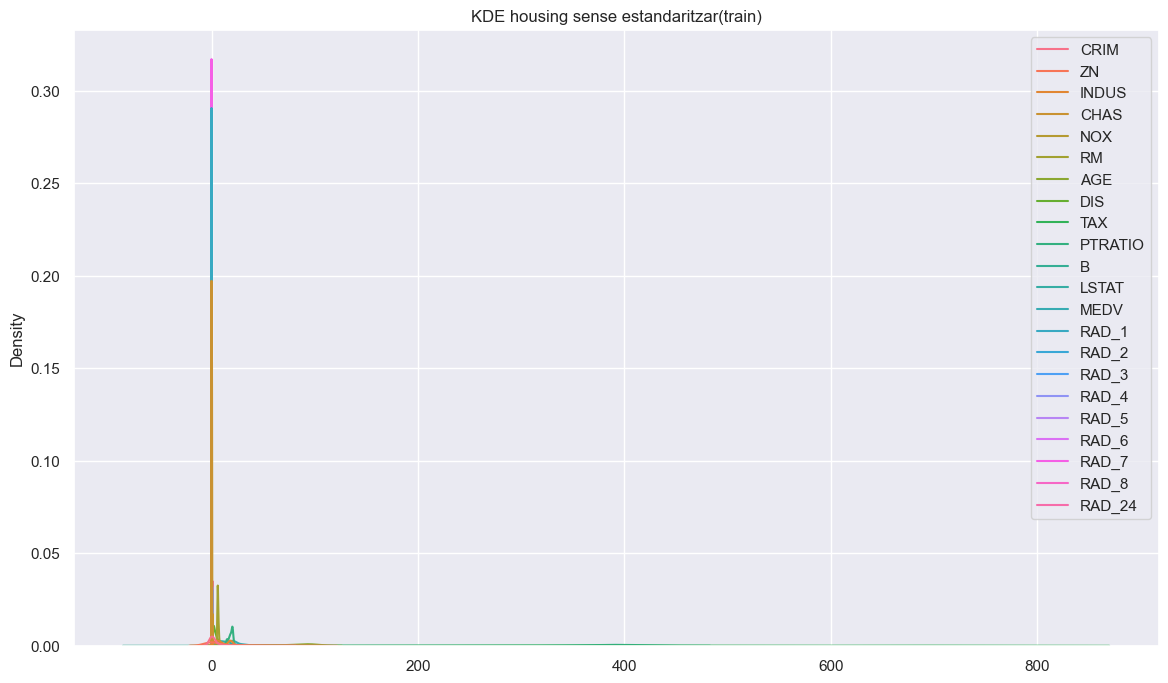

In [29]:
sns.kdeplot(data=train_df).set(title="KDE housing sense estandaritzar(train)")
plt.show

Com poder veure, al no estar les dades estandaritzades, el gràfic no ens aporta valor. Així que les estandaritzarem. El primer que hem de fet es veure quin tipus de distribució tenen per triar un tipus d'escalat adequat.

In [30]:
def is_gaussian(eval_column):
    stat, p = shapiro(eval_column)
    if p > 0.05:
        return "Cert"
    return "Fals"

In [31]:
for element in train_df:
    print(f"És {is_gaussian(train_df[element])} que {element} probablement té una distribució gaussiana")

És Fals que CRIM probablement té una distribució gaussiana
És Fals que ZN probablement té una distribució gaussiana
És Fals que INDUS probablement té una distribució gaussiana
És Fals que CHAS probablement té una distribució gaussiana
És Fals que NOX probablement té una distribució gaussiana
És Fals que RM probablement té una distribució gaussiana
És Fals que AGE probablement té una distribució gaussiana
És Fals que DIS probablement té una distribució gaussiana
És Fals que TAX probablement té una distribució gaussiana
És Fals que PTRATIO probablement té una distribució gaussiana
És Fals que B probablement té una distribució gaussiana
És Fals que LSTAT probablement té una distribució gaussiana
És Fals que MEDV probablement té una distribució gaussiana
És Fals que RAD_1 probablement té una distribució gaussiana
És Fals que RAD_2 probablement té una distribució gaussiana
És Fals que RAD_3 probablement té una distribució gaussiana
És Fals que RAD_4 probablement té una distribució gaussiana

Com podem observar, cap dels atributs té distribució gaussiana, així que no podem utilitzar StandardScaler, optarem per RobustScaler pels atributs que tenen outliers i MinMax pels atributs que no tenen outliers.

In [32]:
atributs_amb_outliers=['CRIM', 'ZN', 'RM', 'DIS', 'B', 'LSTAT', 'MEDV']
atributs_sense_outliers=['INDUS', 'NOX', 'AGE', 'TAX', 'PTRATIO']

In [33]:
train_estandaritzat_df=train_df.copy()
train_estandaritzat_df[atributs_amb_outliers]=RobustScaler().fit_transform(train_estandaritzat_df[atributs_amb_outliers])
train_estandaritzat_df[atributs_sense_outliers]=MinMaxScaler().fit_transform(train_estandaritzat_df[atributs_sense_outliers])

In [34]:
train_estandaritzat_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
378,6.277711,0.0,0.646628,0,0.582463,0.300211,0.959574,-0.638485,0.914122,0.808511,...,-0.925926,0,0,0,0,0,0,0,0,1
127,0.001417,0.0,0.785557,0,0.484342,-0.668076,0.957447,-0.501650,0.477099,0.914894,...,-0.543210,0,0,0,1,0,0,0,0,0
82,-0.058306,2.0,0.161290,0,0.070981,0.190275,0.278723,0.727350,0.179389,0.680851,...,0.518519,0,0,0,1,0,0,0,0,0
463,1.493942,0.0,0.646628,0,0.670146,0.487667,0.892553,-0.156908,0.914122,0.808511,...,-0.049383,0,0,0,0,0,0,0,0,1
207,-0.000504,0.0,0.371334,0,0.202505,-0.541226,0.709574,0.371551,0.171756,0.638298,...,0.234568,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,-0.058603,6.4,0.116569,0,0.000000,-0.410148,0.139362,2.026843,0.244275,0.404255,...,0.037037,1,0,0,0,0,0,0,0,0
72,-0.043533,0.0,0.379399,0,0.043841,-0.143763,0.019149,0.688769,0.225191,0.702128,...,0.271605,0,0,0,1,0,0,0,0,0
396,1.507601,0.0,0.646628,0,0.628392,0.335447,0.957447,-0.539584,0.914122,0.808511,...,-1.000000,0,0,0,0,0,0,0,0,1
235,0.020550,0.0,0.210411,0,0.240084,-0.114165,0.590426,0.132378,0.229008,0.510638,...,0.419753,0,0,0,0,0,0,0,1,0


In [35]:
train_estandaritzat_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,...,339.000000,339.000000,339.000000,339.000000,339.00000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,0.949966,0.877050,0.400201,0.079646,0.342876,0.113446,0.672058,0.182611,0.423456,0.618998,...,0.208638,0.038348,0.056047,0.070796,0.20944,0.230088,0.053097,0.032448,0.044248,0.265487
std,2.326527,1.844698,0.251985,0.271145,0.246339,0.944261,0.300496,0.719524,0.323767,0.231565,...,1.122663,0.192319,0.230353,0.256864,0.40751,0.421511,0.224559,0.177450,0.205949,0.442245
min,-0.066428,0.000000,0.000000,0.000000,0.000000,-3.247357,0.000000,-0.725751,0.000000,0.000000,...,-1.925926,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.045109,0.000000,0.189883,0.000000,0.116910,-0.414376,0.422872,-0.397493,0.175573,0.468085,...,-0.456790,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.346041,0.000000,0.304802,0.000000,0.784043,0.000000,0.272901,0.680851,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.954891,1.000000,0.646628,0.000000,0.491649,0.585624,0.939362,0.602507,0.914122,0.808511,...,0.543210,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19.664257,8.000000,1.000000,1.000000,1.000000,3.144468,1.000000,3.015582,1.000000,1.000000,...,3.629630,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Tornem a fer gràfic KDE amb les dades estandaritzades per veure la diferència

[Text(0.5, 1.0, 'KDE housing estandaritzat(train)')]

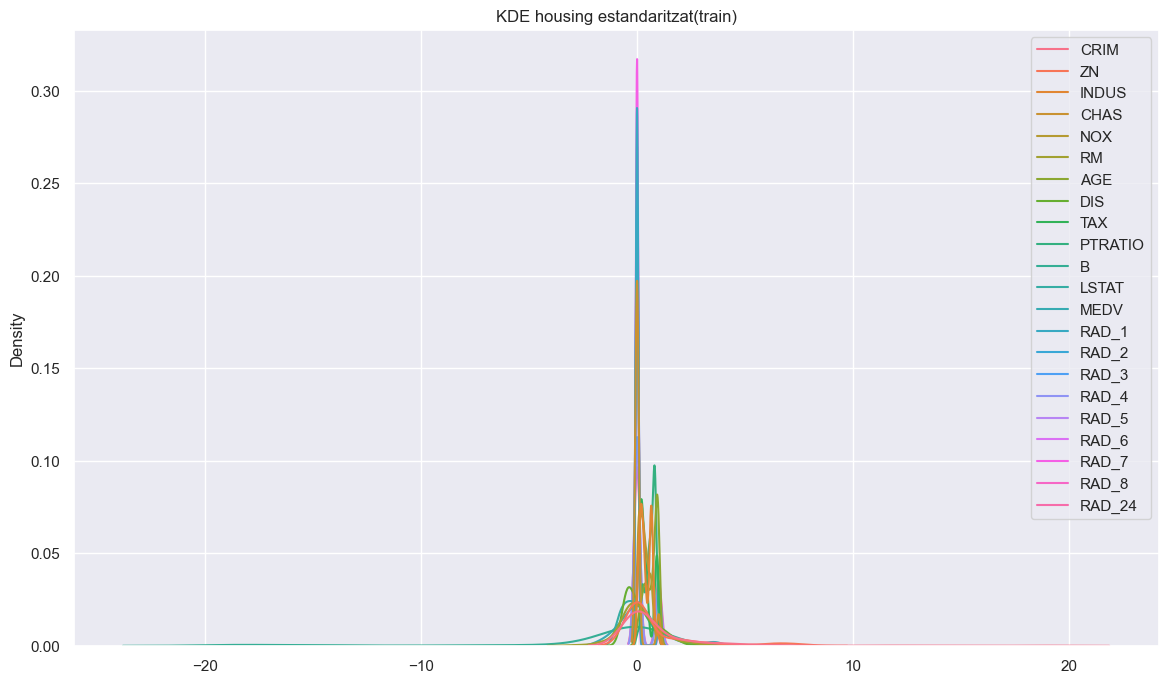

In [36]:
sns.kdeplot(data=train_estandaritzat_df).set(title="KDE housing estandaritzat(train)")

Podem observar una millora en la informació que ens aporta el gràfic després de l'estandarització. Tot i això el resultat es probablement millorable. Repetirem tot el procés amb les dades de test.

In [37]:
test_df=pd.get_dummies(test_df, columns=['RAD'])

In [38]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 307 to 347
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     167 non-null    float64
 1   ZN       167 non-null    float64
 2   INDUS    167 non-null    float64
 3   CHAS     167 non-null    int64  
 4   NOX      167 non-null    float64
 5   RM       167 non-null    float64
 6   AGE      167 non-null    float64
 7   DIS      167 non-null    float64
 8   TAX      167 non-null    float64
 9   PTRATIO  167 non-null    float64
 10  B        167 non-null    float64
 11  LSTAT    167 non-null    float64
 12  MEDV     167 non-null    float64
 13  RAD_1    167 non-null    uint8  
 14  RAD_2    167 non-null    uint8  
 15  RAD_3    167 non-null    uint8  
 16  RAD_4    167 non-null    uint8  
 17  RAD_5    167 non-null    uint8  
 18  RAD_6    167 non-null    uint8  
 19  RAD_7    167 non-null    uint8  
 20  RAD_8    167 non-null    uint8  
 21  RAD_24   167 n

In [39]:
for element in test_df:
    print(f"És {is_gaussian(test_df[element])} que {element} probablement té una distribució gaussiana")

És Fals que CRIM probablement té una distribució gaussiana
És Fals que ZN probablement té una distribució gaussiana
És Fals que INDUS probablement té una distribució gaussiana
És Fals que CHAS probablement té una distribució gaussiana
És Fals que NOX probablement té una distribució gaussiana
És Fals que RM probablement té una distribució gaussiana
És Fals que AGE probablement té una distribució gaussiana
És Fals que DIS probablement té una distribució gaussiana
És Fals que TAX probablement té una distribució gaussiana
És Fals que PTRATIO probablement té una distribució gaussiana
És Fals que B probablement té una distribució gaussiana
És Fals que LSTAT probablement té una distribució gaussiana
És Fals que MEDV probablement té una distribució gaussiana
És Fals que RAD_1 probablement té una distribució gaussiana
És Fals que RAD_2 probablement té una distribució gaussiana
És Fals que RAD_3 probablement té una distribució gaussiana
És Fals que RAD_4 probablement té una distribució gaussiana

In [40]:
test_estandaritzat_df=test_df.copy()
test_estandaritzat_df[atributs_amb_outliers]=RobustScaler().fit_transform(test_estandaritzat_df[atributs_amb_outliers])
test_estandaritzat_df[atributs_sense_outliers]=MinMaxScaler().fit_transform(test_estandaritzat_df[atributs_sense_outliers])

In [41]:
test_estandaritzat_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
307,-0.069731,1.650,0.035108,0,0.179012,0.827957,0.694130,0.028198,0.065010,0.600000,...,0.792208,0,0,0,0,0,0,1,0,0
343,-0.077575,2.750,0.095508,0,0.203704,0.592934,0.550978,0.823432,0.347992,0.511111,...,0.233766,0,0,0,0,1,0,0,0,0
47,-0.010645,0.000,0.213666,0,0.129630,-0.430108,0.850669,0.810113,0.086042,0.544444,...,-0.714286,0,0,1,0,0,0,0,0,0
67,-0.066917,0.625,0.181955,0,0.049383,-0.663594,0.190525,1.062339,0.300191,0.655556,...,-0.012987,0,0,0,1,0,0,0,0,0
362,1.121799,0.000,0.636089,0,0.792181,-1.456221,0.960865,-0.308405,0.913958,0.800000,...,-0.168831,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-0.023299,1.100,0.174028,0,0.094650,0.626728,0.150360,1.476738,0.271511,0.677778,...,0.532468,0,0,0,0,0,0,1,0,0
421,2.219906,0.000,0.636089,0,0.685185,-0.466974,0.951596,-0.379837,0.913958,0.800000,...,-1.025974,0,0,0,0,0,0,0,0,1
422,3.870038,0.000,0.636089,0,0.471193,-1.016897,0.872297,-0.355943,0.913958,0.800000,...,-0.168831,0,0,0,0,0,0,0,0,1
286,-0.079473,4.000,0.019253,0,0.000000,-0.122888,0.294542,1.870612,0.101338,0.577778,...,-0.259740,1,0,0,0,0,0,0,0,0


In [42]:
test_estandaritzat_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,...,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.980275,0.608832,0.354781,0.047904,0.342723,0.076860,0.663850,0.216353,0.418566,0.614504,...,0.120227,0.041916,0.029940,0.083832,0.233533,0.221557,0.047904,0.035928,0.053892,0.251497
std,2.782701,1.194913,0.257707,0.214206,0.229909,1.169248,0.288305,0.652944,0.318825,0.238378,...,1.222348,0.201000,0.170935,0.277970,0.424351,0.416543,0.214206,0.186671,0.226484,0.435178
min,-0.082326,0.000000,0.000000,0.000000,0.000000,-4.222734,0.000000,-0.597096,0.000000,0.000000,...,-2.051948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.060660,0.000000,0.129294,0.000000,0.150206,-0.507680,0.399588,-0.308966,0.177820,0.488889,...,-0.597403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.275953,0.000000,0.302469,0.000000,0.725026,0.000000,0.284895,0.677778,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.939340,1.000000,0.636089,0.000000,0.491770,0.492320,0.929454,0.691034,0.913958,0.800000,...,0.402597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
max,29.128938,4.750000,1.000000,1.000000,1.000000,3.794163,1.000000,2.376281,1.000000,1.000000,...,3.623377,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Tornem a fer gràfic KDE amb les dades estandaritzades per veure la diferència

[Text(0.5, 1.0, 'KDE housing estandaritzat(test)')]

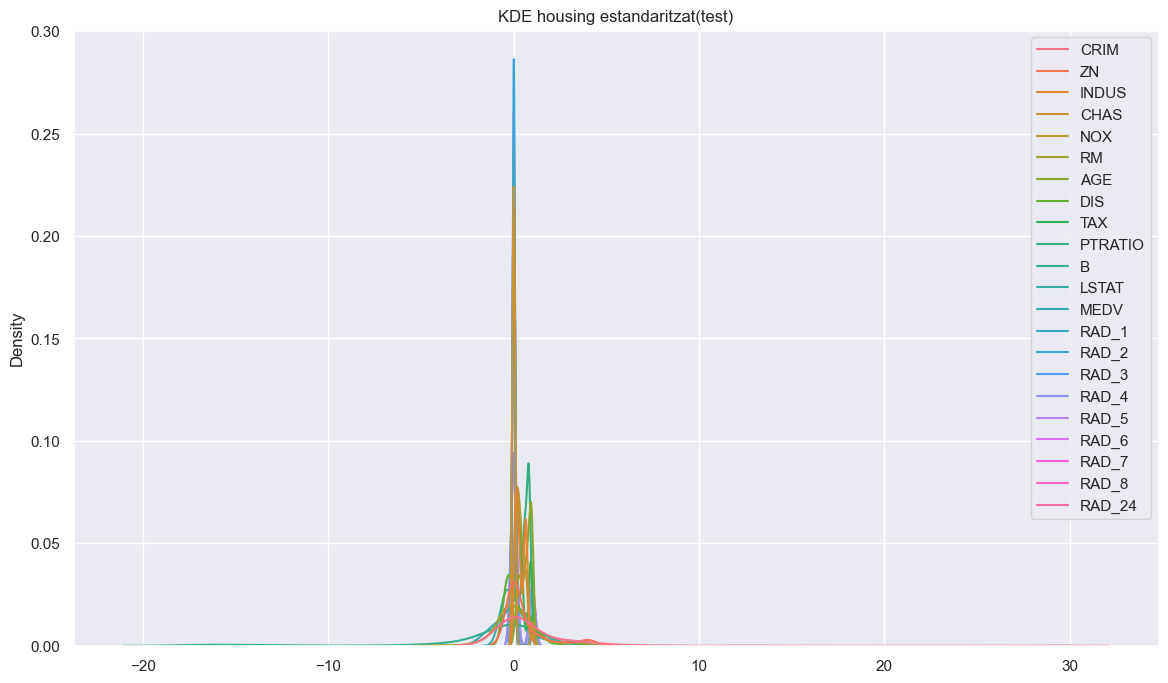

In [43]:
sns.kdeplot(data=test_estandaritzat_df).set(title="KDE housing estandaritzat(test)")

### - Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

In [44]:
train_estandaritzat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 378 to 37
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     339 non-null    float64
 1   ZN       339 non-null    float64
 2   INDUS    339 non-null    float64
 3   CHAS     339 non-null    int64  
 4   NOX      339 non-null    float64
 5   RM       339 non-null    float64
 6   AGE      339 non-null    float64
 7   DIS      339 non-null    float64
 8   TAX      339 non-null    float64
 9   PTRATIO  339 non-null    float64
 10  B        339 non-null    float64
 11  LSTAT    339 non-null    float64
 12  MEDV     339 non-null    float64
 13  RAD_1    339 non-null    uint8  
 14  RAD_2    339 non-null    uint8  
 15  RAD_3    339 non-null    uint8  
 16  RAD_4    339 non-null    uint8  
 17  RAD_5    339 non-null    uint8  
 18  RAD_6    339 non-null    uint8  
 19  RAD_7    339 non-null    uint8  
 20  RAD_8    339 non-null    uint8  
 21  RAD_24   339 no

In [45]:
train_estandaritzat_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,...,339.000000,339.000000,339.000000,339.000000,339.00000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,0.949966,0.877050,0.400201,0.079646,0.342876,0.113446,0.672058,0.182611,0.423456,0.618998,...,0.208638,0.038348,0.056047,0.070796,0.20944,0.230088,0.053097,0.032448,0.044248,0.265487
std,2.326527,1.844698,0.251985,0.271145,0.246339,0.944261,0.300496,0.719524,0.323767,0.231565,...,1.122663,0.192319,0.230353,0.256864,0.40751,0.421511,0.224559,0.177450,0.205949,0.442245
min,-0.066428,0.000000,0.000000,0.000000,0.000000,-3.247357,0.000000,-0.725751,0.000000,0.000000,...,-1.925926,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.045109,0.000000,0.189883,0.000000,0.116910,-0.414376,0.422872,-0.397493,0.175573,0.468085,...,-0.456790,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.346041,0.000000,0.304802,0.000000,0.784043,0.000000,0.272901,0.680851,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.954891,1.000000,0.646628,0.000000,0.491649,0.585624,0.939362,0.602507,0.914122,0.808511,...,0.543210,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19.664257,8.000000,1.000000,1.000000,1.000000,3.144468,1.000000,3.015582,1.000000,1.000000,...,3.629630,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Aquí ens on podem notar més diferència en el resultat de l'estandarització, ja després de l'estandarització els valors de mitjana, mínims, màxims, percentils, han canviat molt. Si necessitessim alguna d'aquestes dades haurien de recorrer als dataframes que conserven les dades no estandaritzades (train_df i test_df)

In [46]:
columnes_dummies=['RAD_1', 'RAD_2', 'RAD_3', 'RAD_4', 'RAD_5', 'RAD_6','RAD_7', 'RAD_8', 'RAD_24']
for element in train_estandaritzat_df[columnes_dummies]:
    print(f"Valors per a {element} : \n{train_estandaritzat_df[element].value_counts()}")

Valors per a RAD_1 : 
0    326
1     13
Name: RAD_1, dtype: int64
Valors per a RAD_2 : 
0    320
1     19
Name: RAD_2, dtype: int64
Valors per a RAD_3 : 
0    315
1     24
Name: RAD_3, dtype: int64
Valors per a RAD_4 : 
0    268
1     71
Name: RAD_4, dtype: int64
Valors per a RAD_5 : 
0    261
1     78
Name: RAD_5, dtype: int64
Valors per a RAD_6 : 
0    321
1     18
Name: RAD_6, dtype: int64
Valors per a RAD_7 : 
0    328
1     11
Name: RAD_7, dtype: int64
Valors per a RAD_8 : 
0    324
1     15
Name: RAD_8, dtype: int64
Valors per a RAD_24 : 
0    249
1     90
Name: RAD_24, dtype: int64


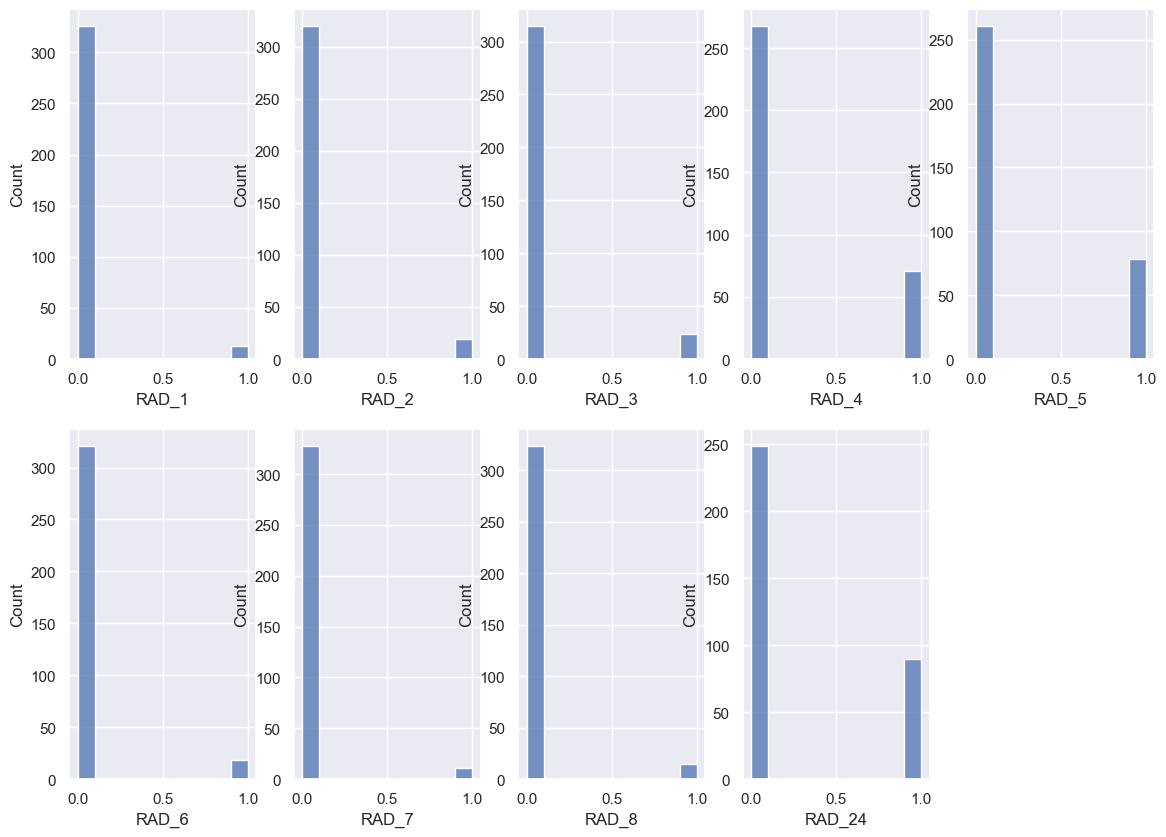

In [47]:
fig = plt.figure(figsize=(14,10))
for element in train_estandaritzat_df[columnes_dummies]:
    ax=fig.add_subplot(2, (len(columnes_dummies)//2 + 1), (columnes_dummies.index(element) + 1))
    sns.histplot(train_estandaritzat_df[element],ax=ax)

<Axes: ylabel='Density'>

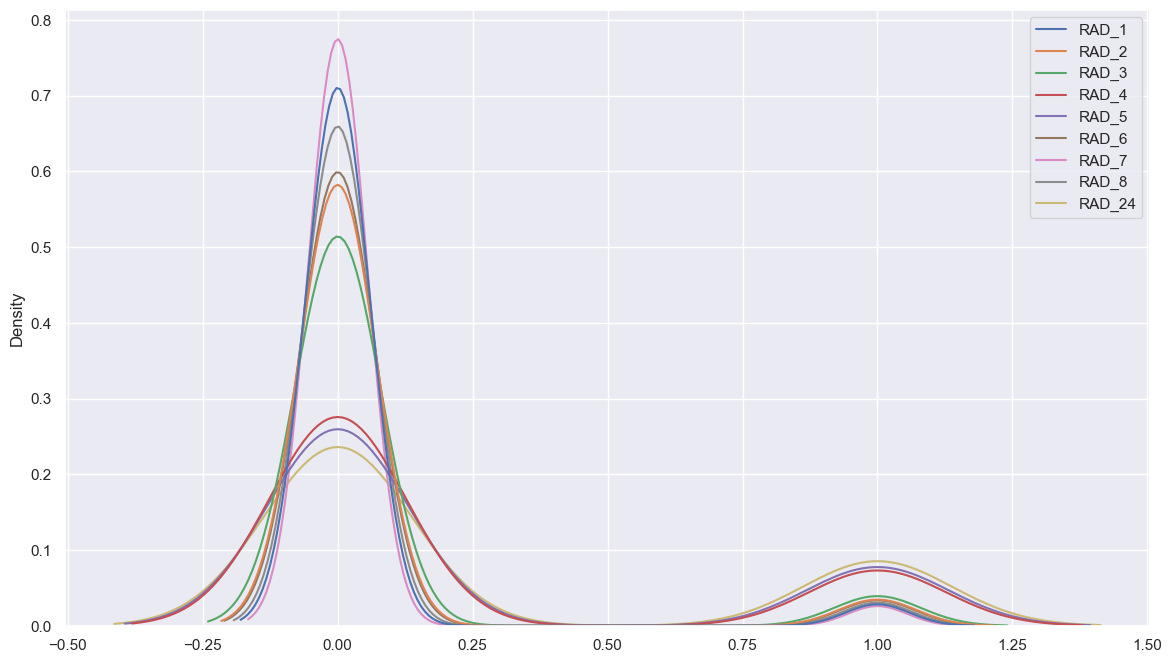

In [48]:
sns.set(rc={'figure.figsize':(14,8)})
sns.kdeplot(train_estandaritzat_df[columnes_dummies])

Amb els dos gràfics anteriors podem veure la distribució dels atributs dummies que hem creat, quins tenen més valors a 0 i quins tenen més valors a 1

<Axes: >

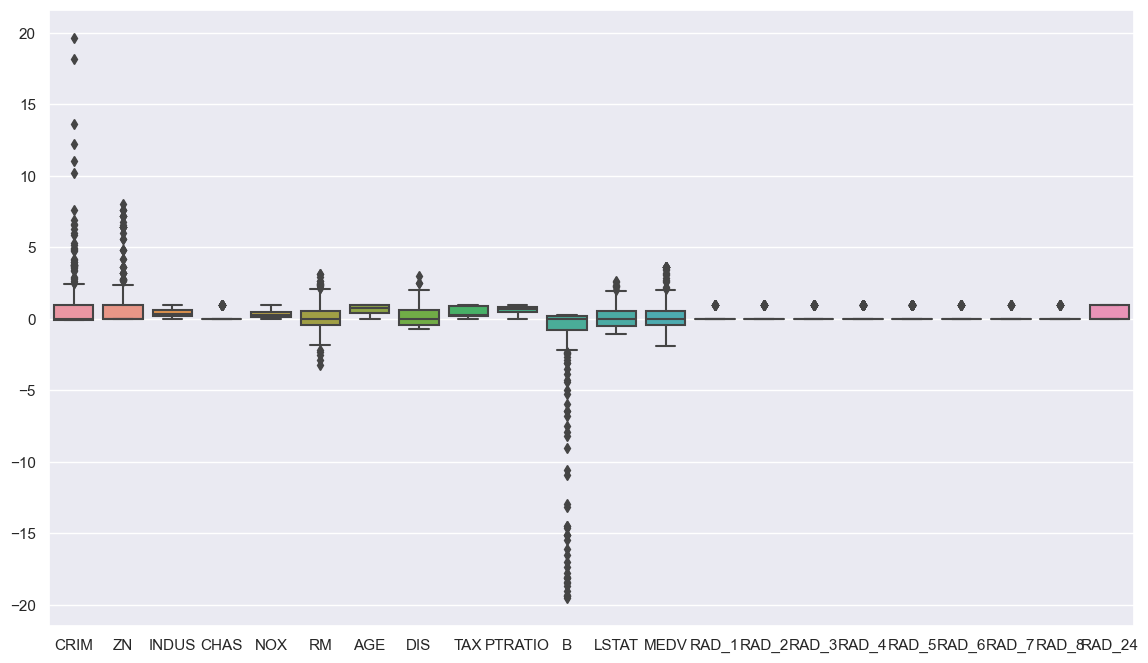

In [49]:
sns.boxplot(train_estandaritzat_df)

L'estandarització ens permet poder tenir gràfics on surtin tots els atributs i tot i així ens aporti informació cosa que no pasava abans perquè la diferència d'escala ens feia gairebé invisibles els atributs d'escala petita. Ara els únics atributs que es veuen com una líniea son els binaris.

<Axes: >

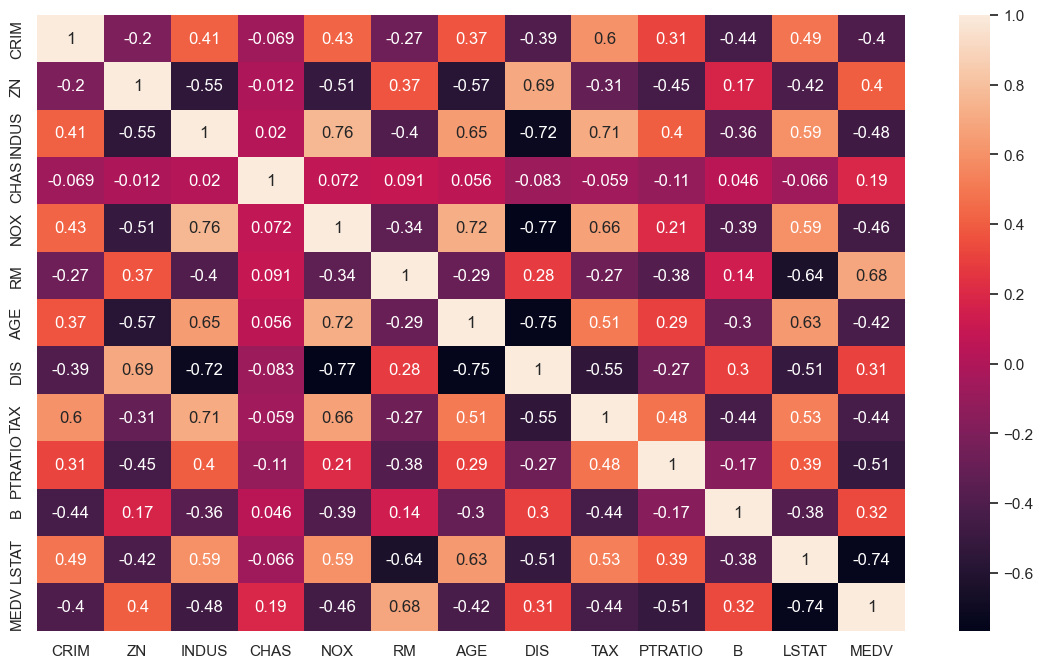

In [50]:
sns.heatmap(train_estandaritzat_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS', 'TAX','PTRATIO','B','LSTAT','MEDV']].corr(), annot=True)

Com podem comprovar el procés d'estandarització no ha afectat a la correlació entre les variables, això es molt important per al treball futur amb les dades. 

Mostrarem comparació de la distribució de les dades de les dades original i les estandaritzades, per veure que els canvis són només d'escala.

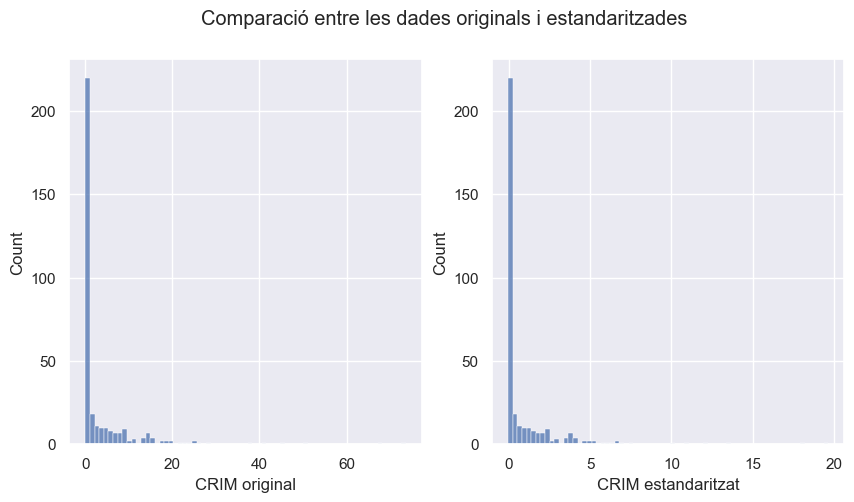

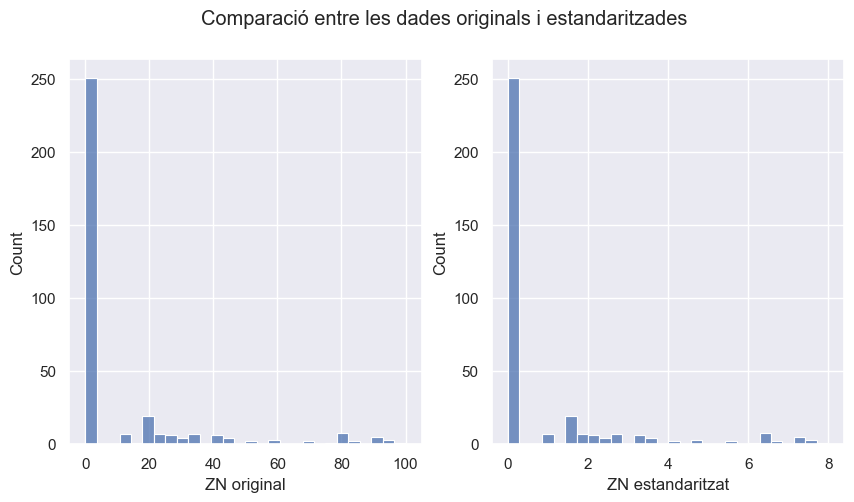

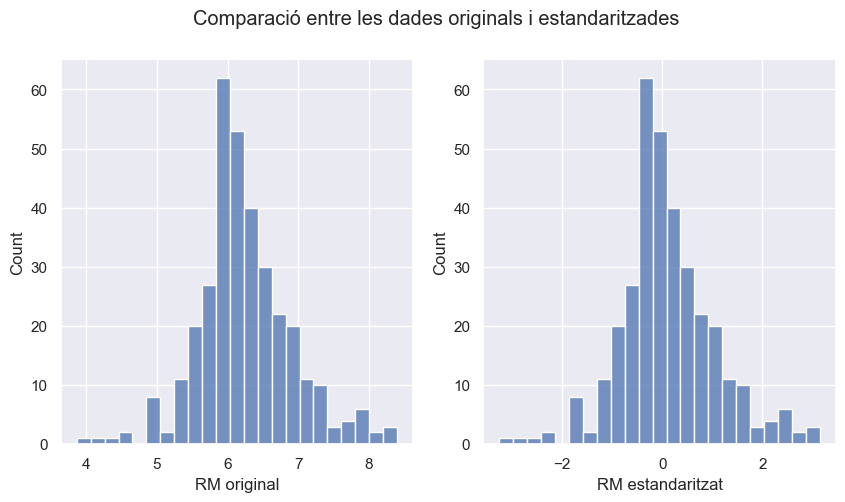

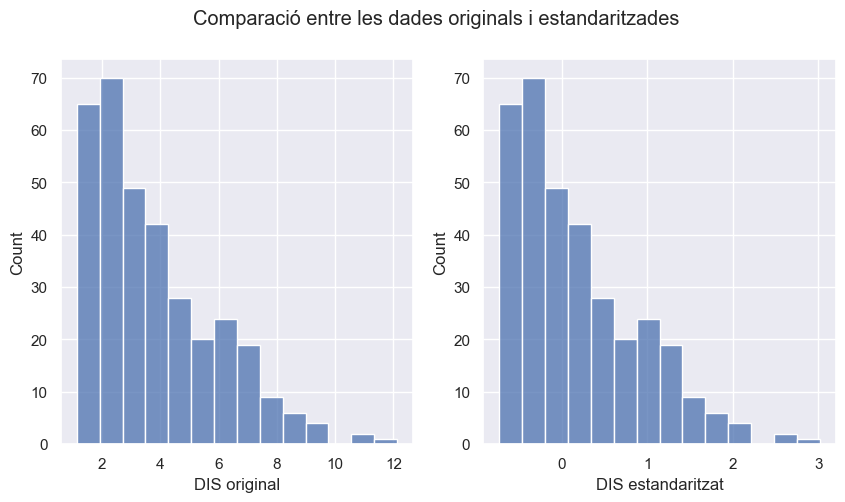

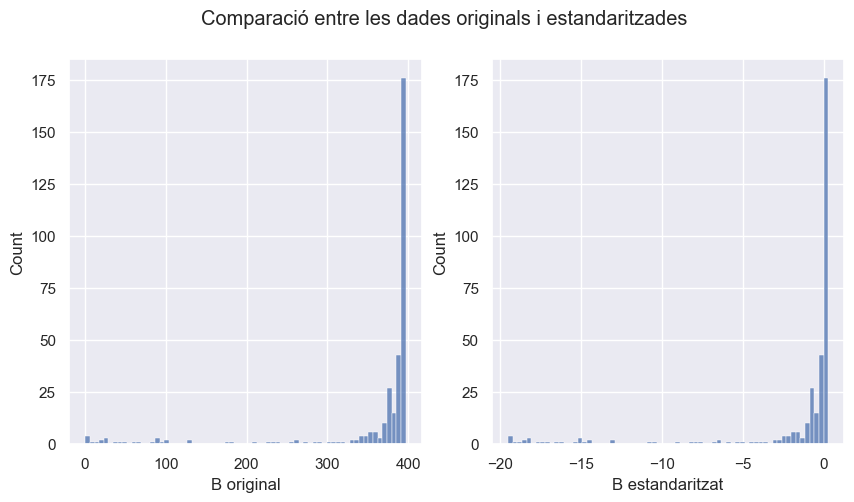

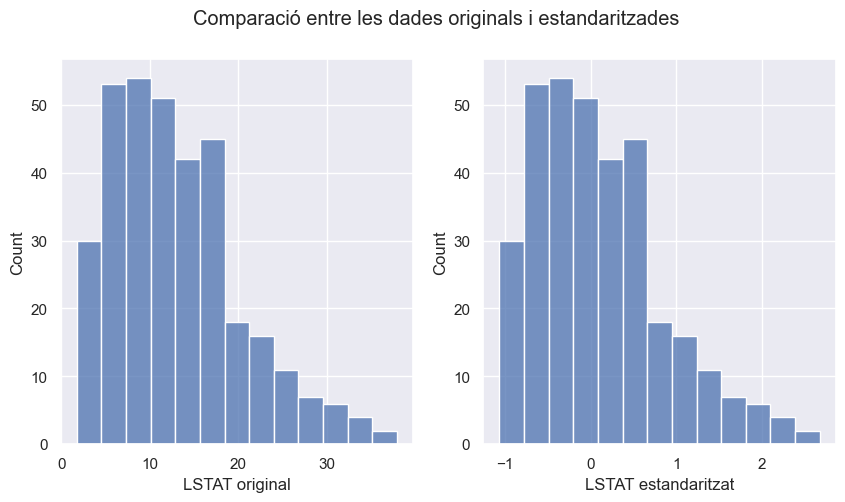

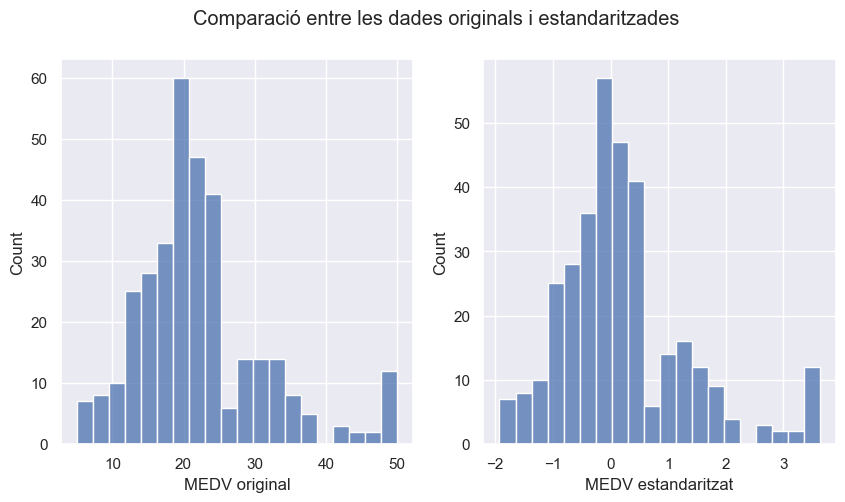

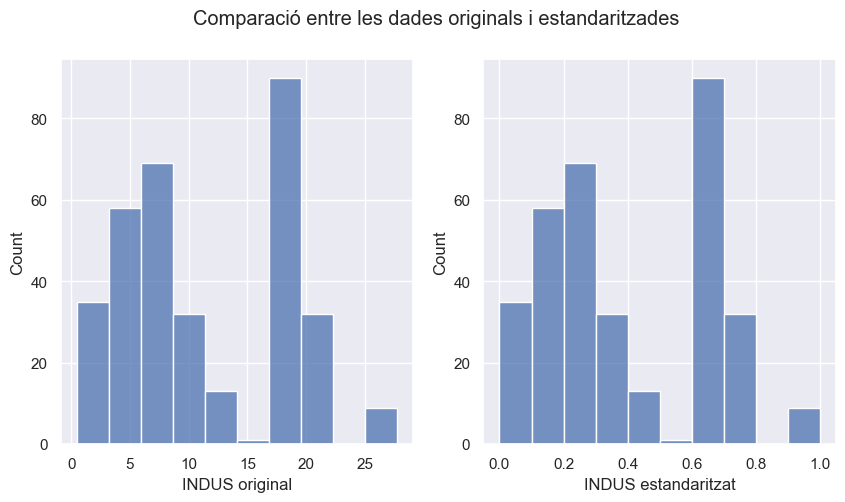

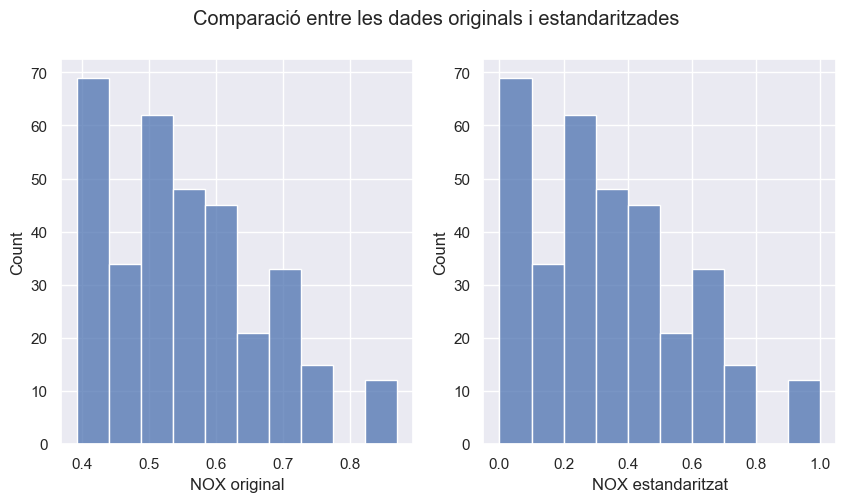

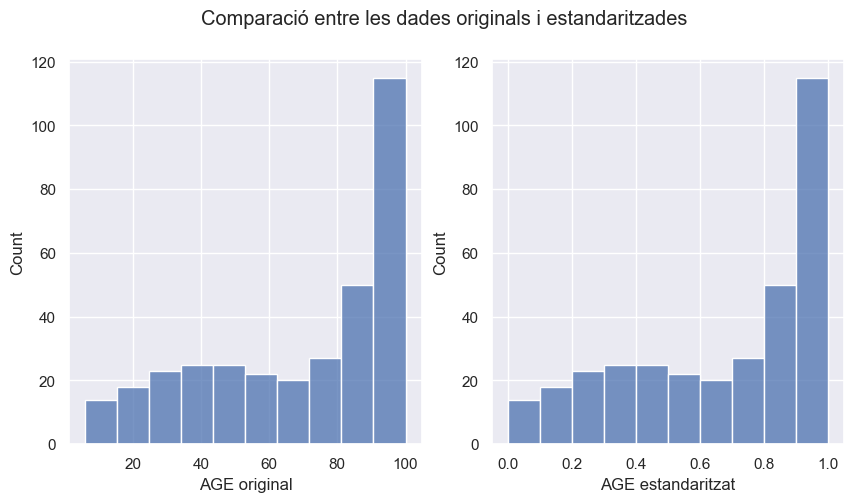

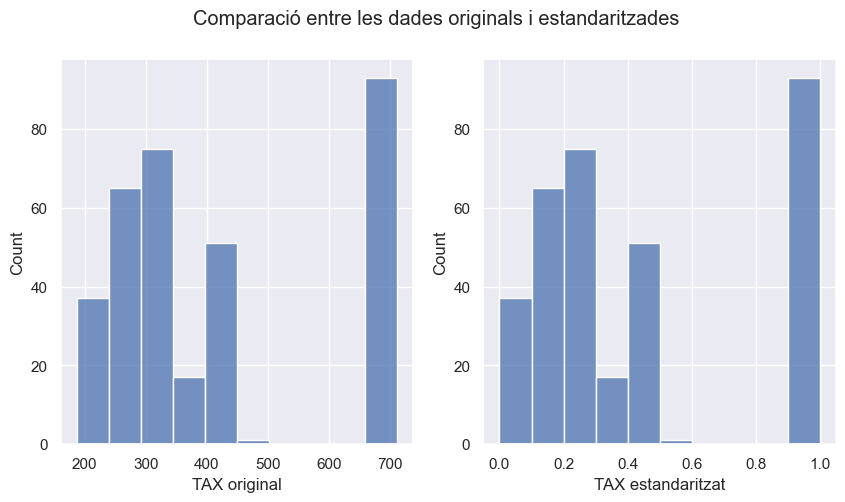

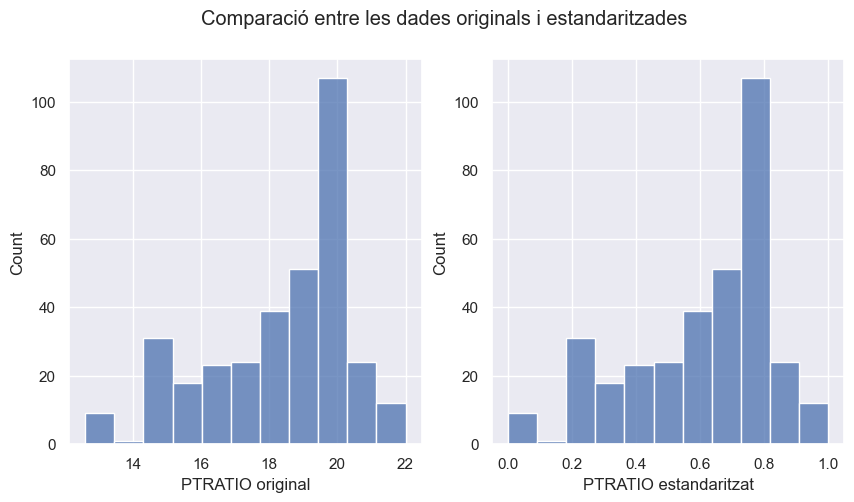

In [51]:
columnes_transformades= atributs_amb_outliers + atributs_sense_outliers

for element in columnes_transformades:
    fig = plt.figure(figsize=(10,5))
    plt.suptitle("Comparació entre les dades originals i estandaritzades")
    ax=fig.add_subplot(1, 2, 1)
    ax.set(xlabel= element + ' original')
    sns.histplot(train_df[element],ax=ax)
    ax2=fig.add_subplot(1, 2, 2)
    ax2.set(xlabel= element + ' estandaritzat')
    sns.histplot(train_estandaritzat_df[element], ax=ax2)

Comprovem que les dades estandaritzades de train i test han quedat amb la mateixa distribució

C:\Users\mabi1\AppData\Local\Temp\ipykernel_9364\2152229735.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10,5))


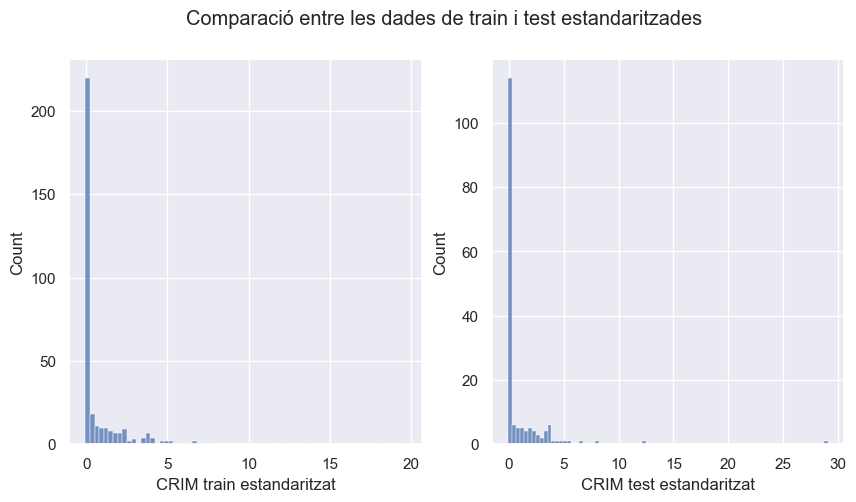

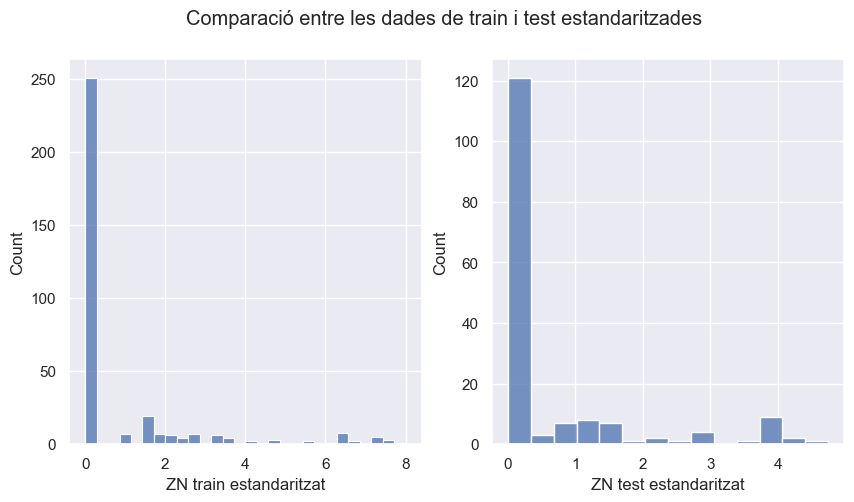

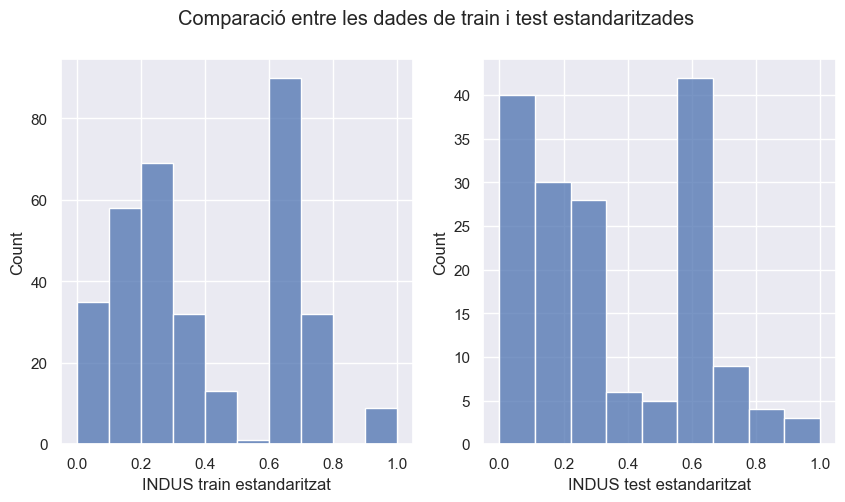

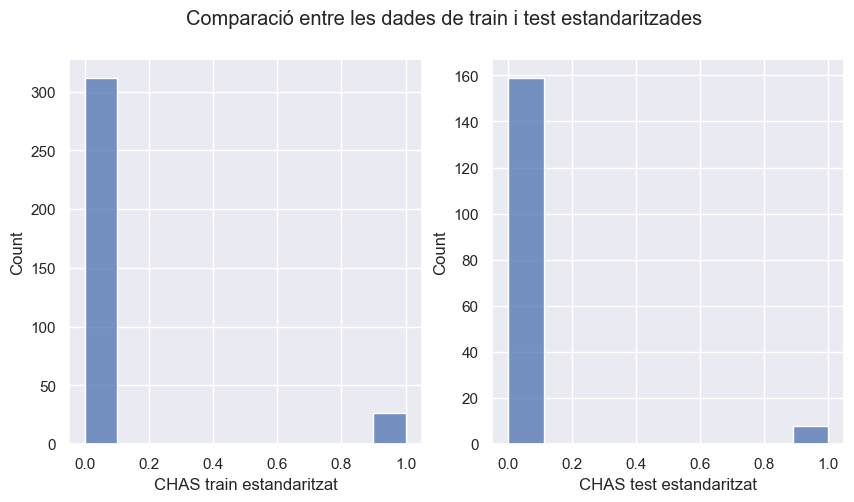

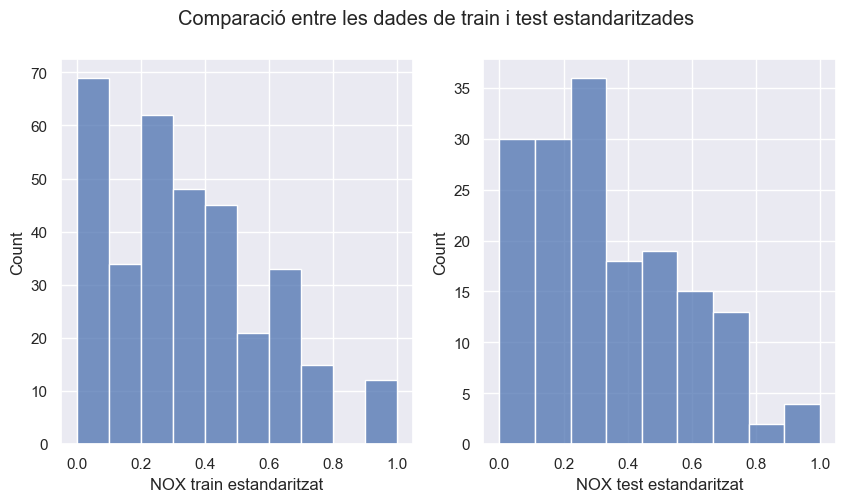

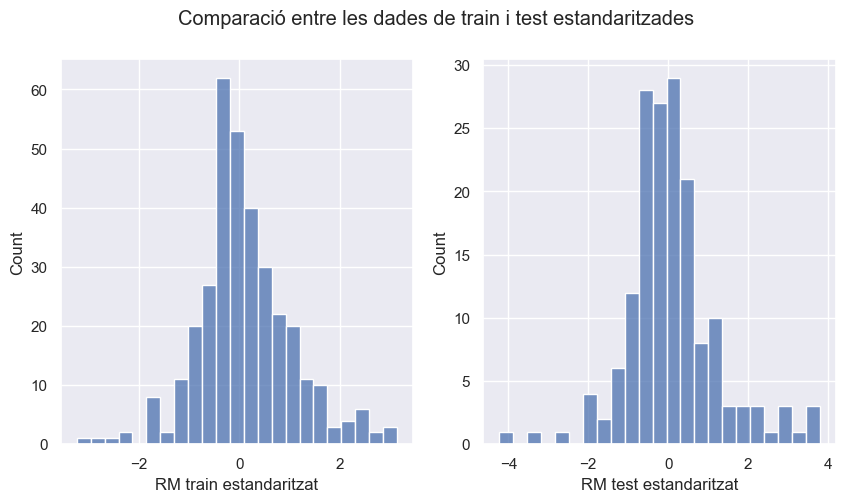

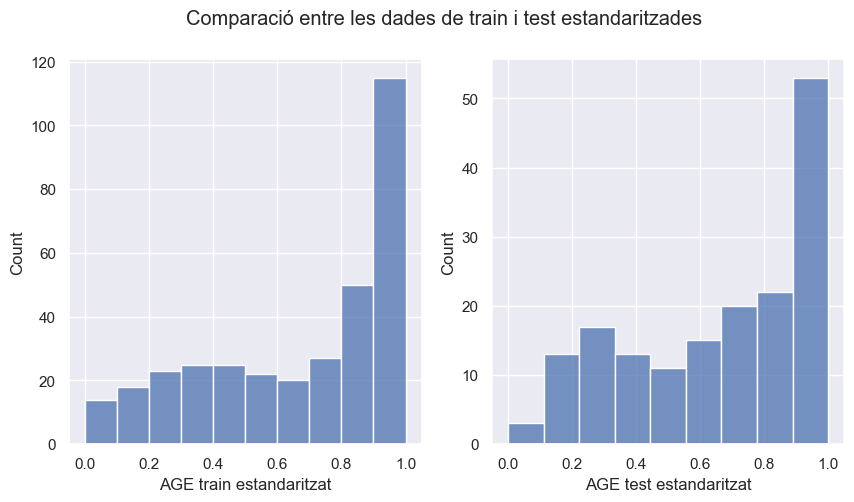

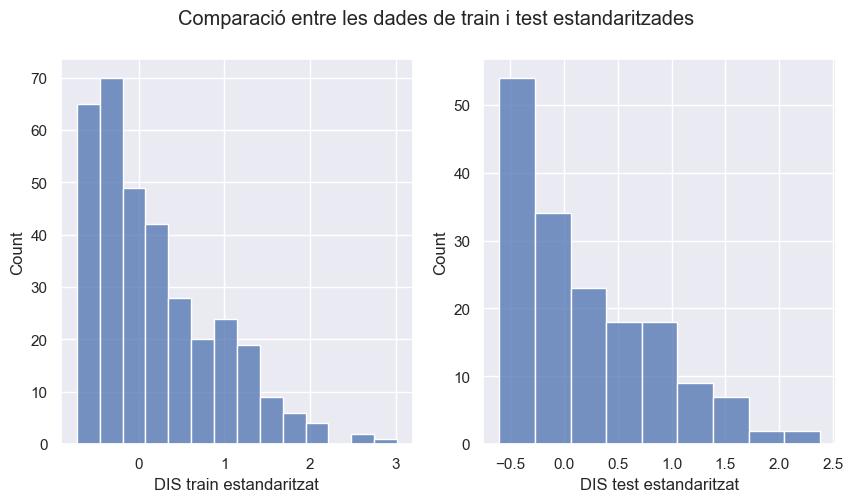

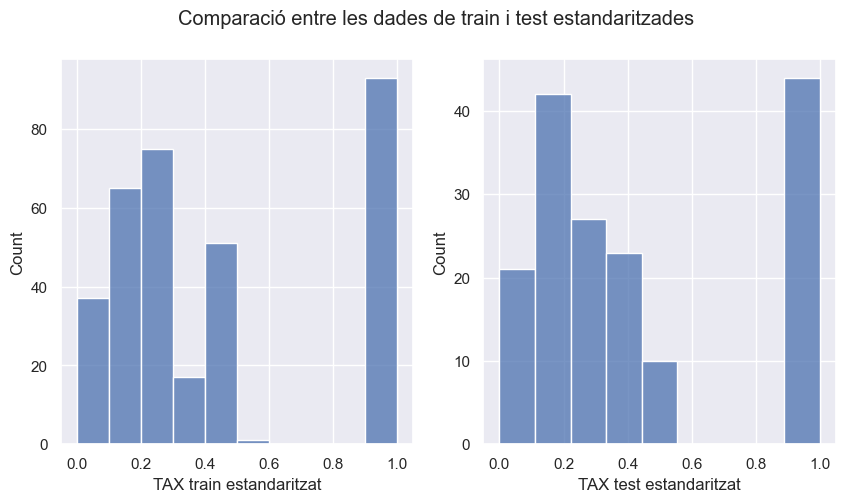

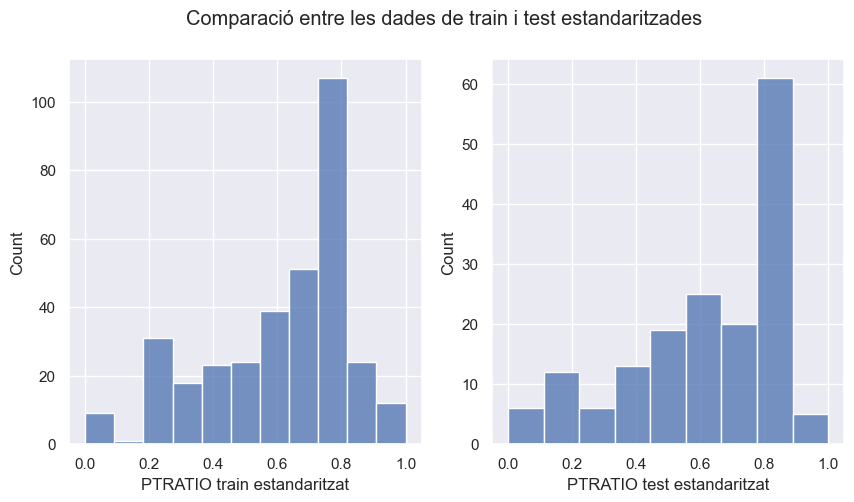

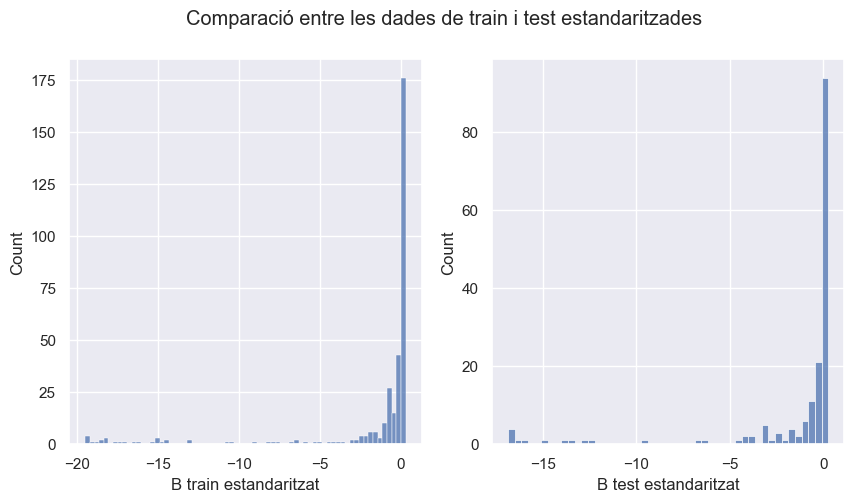

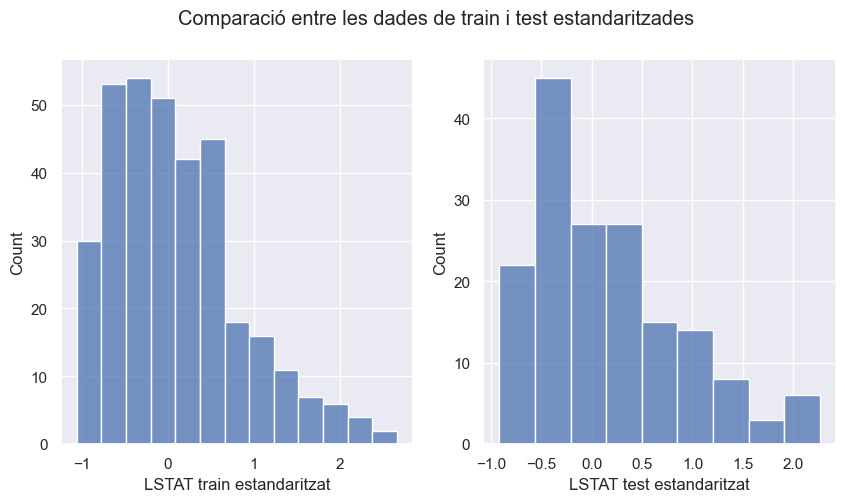

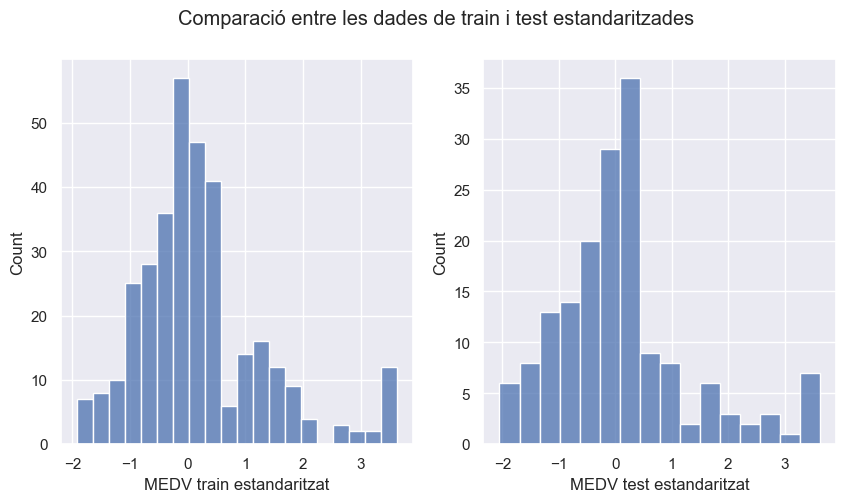

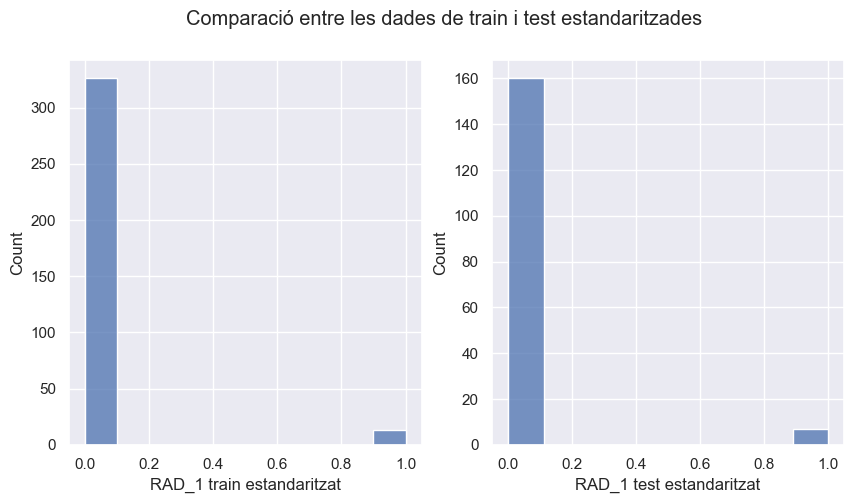

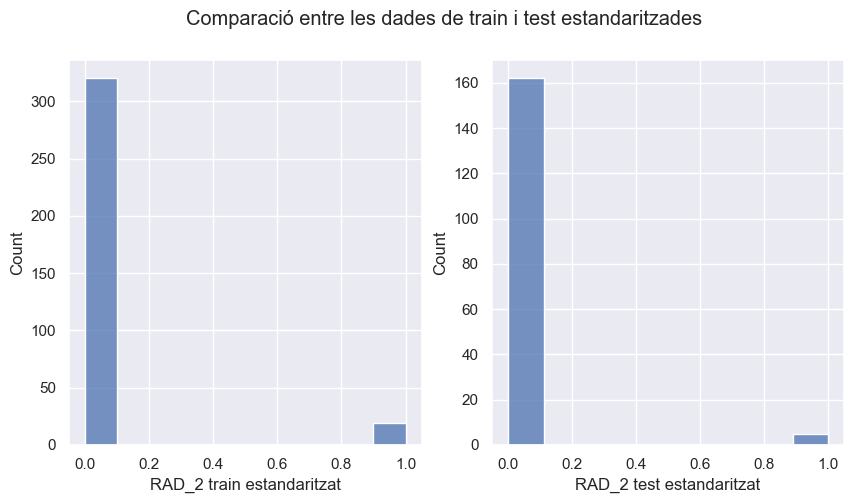

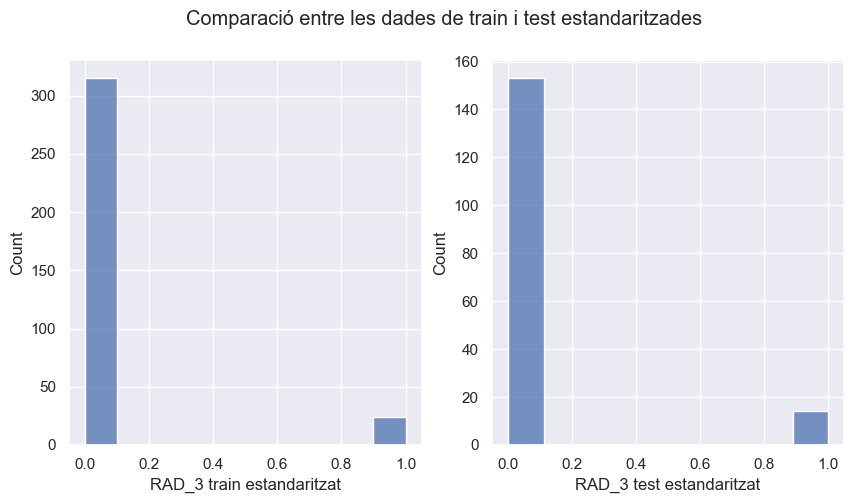

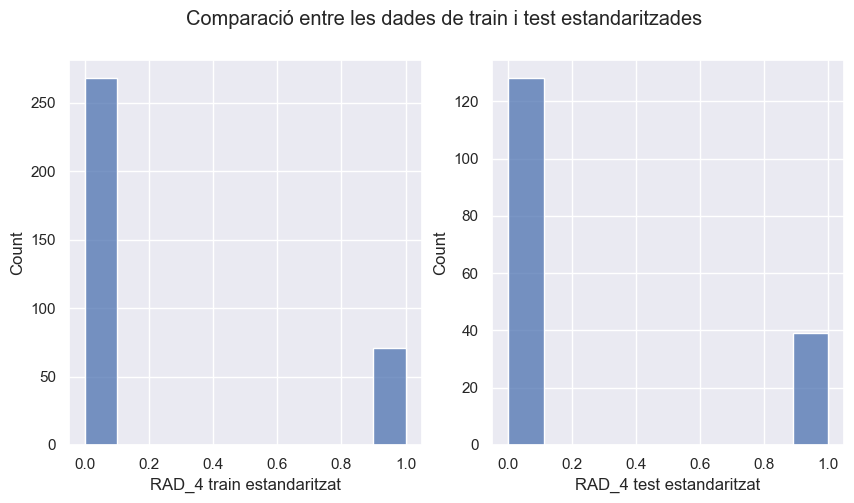

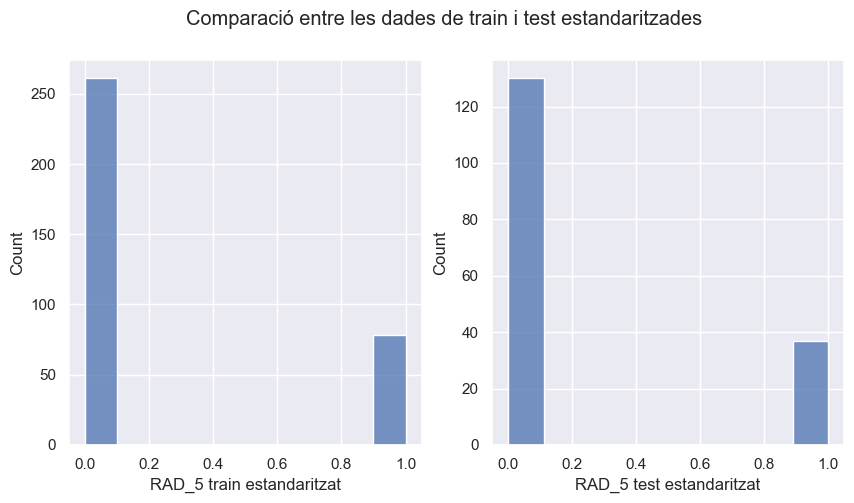

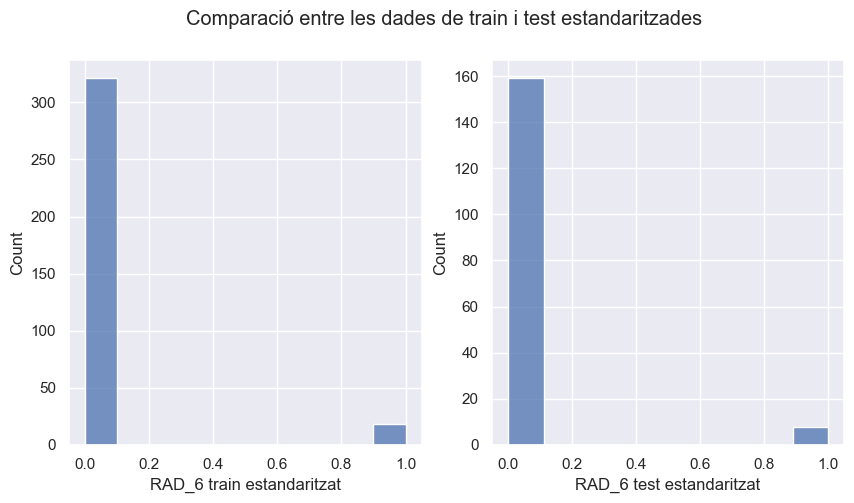

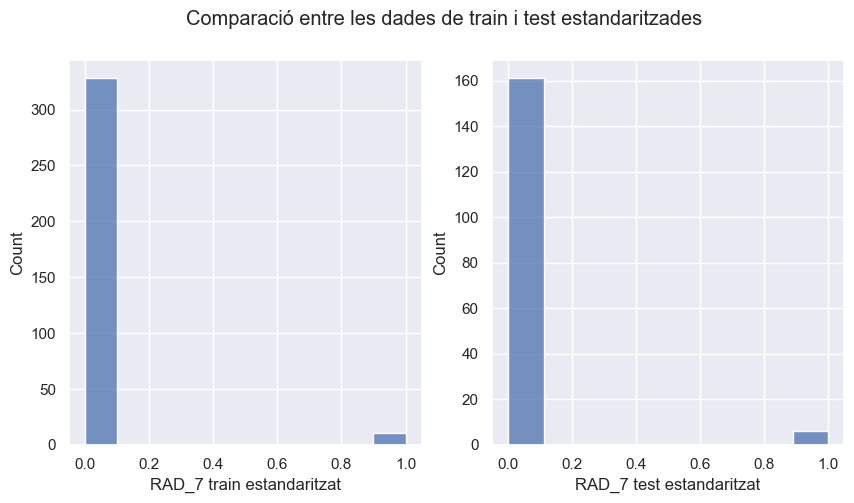

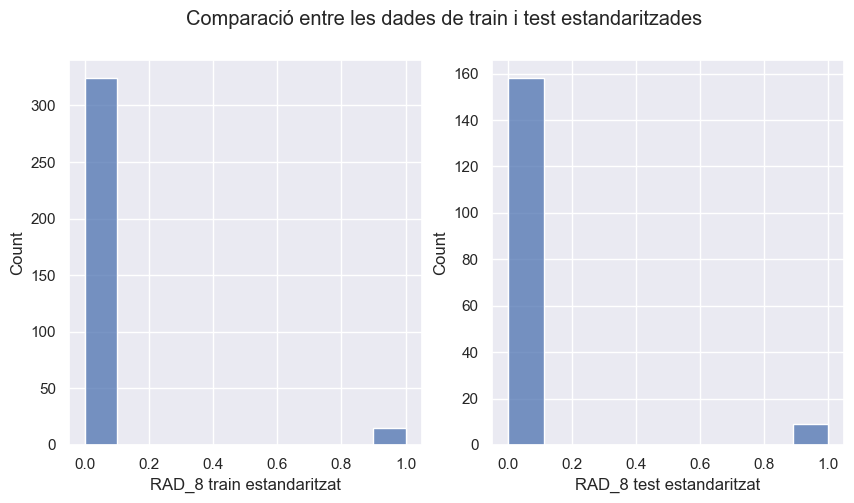

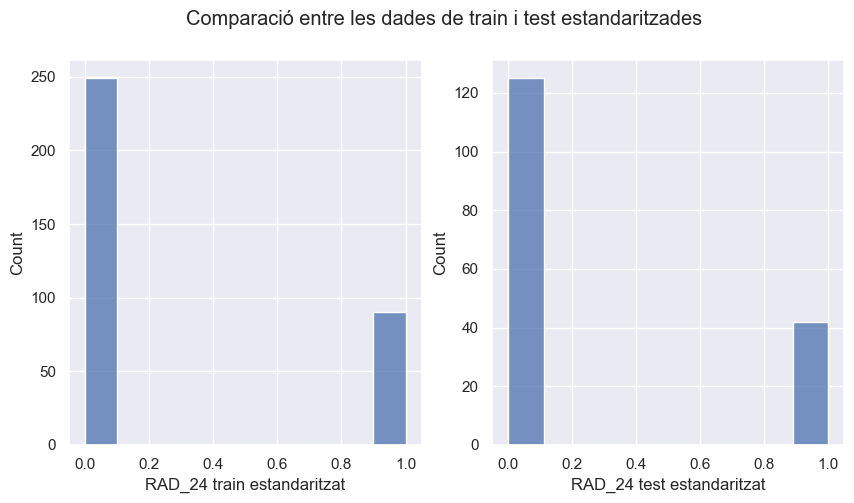

In [52]:
for element in train_estandaritzat_df.columns:
    fig = plt.figure(figsize=(10,5))
    plt.suptitle("Comparació entre les dades de train i test estandaritzades")
    ax=fig.add_subplot(1, 2, 1)
    ax.set(xlabel= element + ' train estandaritzat')
    sns.histplot(train_estandaritzat_df[element],ax=ax)
    ax2=fig.add_subplot(1, 2, 2)
    ax2.set(xlabel= element + ' test estandaritzat')
    sns.histplot(test_estandaritzat_df[element], ax=ax2)

Com podem veure la distribució de les dades es bastant similar, només hi ha algunes petites diferències fruit de l'atzar en la partició. Podem dir que ja tenim les dades de train i test llestes per fer-les servir.